<a href="https://colab.research.google.com/github/Baumeister7/chat/blob/main/Limpieza_preprocesamiento_bmw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## **MASTER DATA SCIENCE:** Nuclio
## **INTEGRANTES DEL GRUPO:** Jose Bau, Hector Maninatt, Victor Barria, Pablo Guimerà, Simone Solieri
## **PROFESOR:** Joseph Gallart
## **ENTREGABLE 1:** Data Preparation - BMW Pricing


#**DATA CLEANING**

## **00 - Importación de librerias y lectura del fichero**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import statistics as stat

In [ ]:
bmw =  pd.read_csv('/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_pricing_v3.csv')

## **01 - E.D.A**

Hacemos un estudio inicial para entender bien los datos que tenemos y eventualmente los problemas que hay con ellos.

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [ ]:
bmw.nunique()

marca                             1
modelo                           76
km                             4784
potencia                         61
fecha_registro                  180
tipo_gasolina                     5
color                            10
tipo_coche                        8
volante_regulable                 2
aire_acondicionado                2
camara_trasera                    2
asientos_traseros_plegables       2
elevalunas_electrico              2
bluetooth                         2
gps                               2
alerta_lim_velocidad              2
precio                          437
fecha_venta                      13
dtype: int64

In [ ]:
bmw['marca'].value_counts()

marca
BMW    3873
Name: count, dtype: int64

El dataset nos viene presentado como bmw_pricing así que tendría sentido dar por hecho que todos los registros se refieren a vehiculos de marca BMW. Sin embargo, siempre es mejor trabajar con informaciones ciertas, así que hacemos un breve analisis para determinar si los modelos con marca nula tienen marca BMW asignada en otras filas.

In [ ]:
def get_modelos_sin_marca(dataset):
  """
  Restituye una lista de modelos que solo tienen marca nula en el dataset
  """
  modelos_con_marca_nula = bmw[bmw['marca'].isnull()]['modelo'].unique()
  resultados = []

  for modelo in modelos_con_marca_nula:

    filas_del_modelo = bmw[bmw['modelo'] == modelo]

    filas_del_modelo_con_marca_asignada = filas_del_modelo[filas_del_modelo['marca'].notnull()]

    if filas_del_modelo_con_marca_asignada.empty:
        resultados.append(modelo)
  return resultados

In [ ]:
modelos_sin_marca = get_modelos_sin_marca(bmw)

In [ ]:
modelos_sin_marca

['M235', '630', '220 Active Tourer', '225 Active Tourer']

Resulta que hay cuatro modelos sin marca en todo el dataset.
Verifiquemos si estos modelos tienen nombres parecidos a otros modelos BMW.

In [ ]:
modelos_bmw = list(bmw['modelo'].unique())

In [ ]:
for i in modelos_sin_marca:
  modelos_bmw.remove(i)

In [ ]:
np.array(modelos_bmw)

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', '316',
       '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '430 Gran Coupé', '635', '520', 'nan', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '216 Gran Tourer', '216 Active Tourer', ' Active Tourer',
       '214 Gran Tourer'], dtype='<U32')

Los nombres de los 4 modelos sin marca se parecen mucho a otros modelos BMW presentes en el dataset, así que podemos asimilar que efectivamente todos los registros son de marca bmw. **Entonces borremos la columna**

In [ ]:
del bmw['marca']

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   tipo_gasolina                4838 non-null   object 
 5   color                        4398 non-null   object 
 6   tipo_coche                   3383 non-null   object 
 7   volante_regulable            4839 non-null   object 
 8   aire_acondicionado           4357 non-null   object 
 9   camara_trasera               4841 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4841 non-null   object 
 12  bluetooth                    4115 non-null   object 
 13  gps               

Control de duplicados

In [ ]:
bmw.duplicated().sum()

0

In [ ]:
# Comprobemos si hay coches iguales en todos los atributos, pero con precios diferentes

In [ ]:
atributos = list(bmw.columns)

In [ ]:
atributos.remove('precio')

In [ ]:
print(atributos)

['modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'fecha_venta']


In [ ]:
'precio' in atributos

False

In [ ]:
bmw.duplicated(subset=atributos).sum()

0

**No hay duplicados**

In [ ]:
# deteccion de nulos

In [ ]:
bmw.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
# esta funcion genera una tabla con el recuento de nulos por cada columna y su porcentaje sobre el total de registros

def get_tabla_nulos(dataset):
  tabla_nulos = dataset.isnull().sum().sort_values(ascending=False).reset_index()
  tabla_nulos.rename(columns={'index':'columna', 0:'nulos'}, inplace=True)
  tabla_nulos.set_index('columna', inplace=True)
  tabla_nulos['% nulos'] = tabla_nulos['nulos']/len(dataset)*100
  return tabla_nulos

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
asientos_traseros_plegables,3391,70.018584
fecha_registro,2423,50.030973
tipo_coche,1460,30.146603
alerta_lim_velocidad,728,15.032005
bluetooth,728,15.032005
aire_acondicionado,486,10.035102
color,445,9.188520
precio,6,0.123890
tipo_gasolina,5,0.103242


In [ ]:
# Analizemos si hay alguna otra columna que se puede eliminar

In [ ]:
bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'precio'}>]]


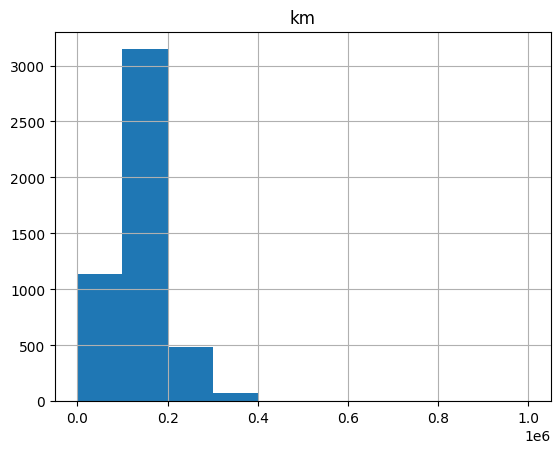

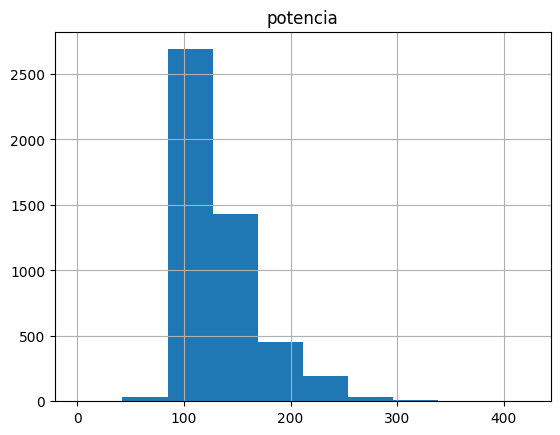

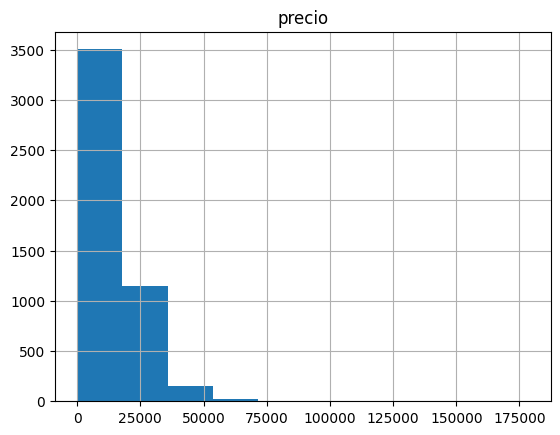

In [ ]:
for i in bmw.describe():
  print(bmw.hist(i))

In [ ]:
for i in bmw:
  if i not in bmw.describe():
    print('\n',bmw[i].value_counts(normalize=True))


 modelo
320                0.155372
520                0.130785
318                0.117355
X3                 0.090496
116                0.073967
                     ...   
M135               0.000207
225                0.000207
i8                 0.000207
630                0.000207
214 Gran Tourer    0.000207
Name: proportion, Length: 76, dtype: float64

 fecha_registro
2013-07-01    0.038430
2014-03-01    0.034298
2014-05-01    0.033471
2013-01-01    0.032231
2013-10-01    0.031818
                ...   
2007-01-01    0.000413
1990-03-01    0.000413
2006-11-01    0.000413
1994-01-01    0.000413
2005-09-01    0.000413
Name: proportion, Length: 180, dtype: float64

 tipo_gasolina
diesel           0.957214
petrol           0.039479
hybrid_petrol    0.001654
Diesel           0.001033
electro          0.000620
Name: proportion, dtype: float64

 color
black     0.340837
grey      0.243292
blue      0.147112
white     0.110050
brown     0.068668
silver    0.066394
red       0.010687
be

Vemos que la columna **tipo_gasolina** no añade mucha información, en cuanto es **diesel** para el 96% de los coches. Se puede considerar que todos los coches del dataset son diesel, entonces borremos la columna.




In [ ]:
del bmw['tipo_gasolina']

También vemos que la columna **gps** tiene el 93% de True. Como estamos buscando atributos ricos de informaciones utiles para predecir el precio, decidemos de borrar la columna porqué pensamos que no tenga suficientes datos para poder medir correctamente el impacto del gps False sobre el precio.

In [ ]:
del bmw['gps']

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   color                        4398 non-null   object 
 5   tipo_coche                   3383 non-null   object 
 6   volante_regulable            4839 non-null   object 
 7   aire_acondicionado           4357 non-null   object 
 8   camara_trasera               4841 non-null   object 
 9   asientos_traseros_plegables  1452 non-null   object 
 10  elevalunas_electrico         4841 non-null   object 
 11  bluetooth                    4115 non-null   object 
 12  alerta_lim_velocidad         4115 non-null   object 
 13  precio            

### **01.1 - Definición de otras columnas utiles**

A partir de **fecha_registro** y **fecha_venta** podemos obtener una variable que razonablemente tendrá bastante importancia en la determinación del precio, osea la **edad del coche** al momento de la venta.

Notando que en **fecha_registro** hay un **50% de nulos**, y que no tenemos suficientes informaciones para asignarles una fecha precisa, decidemos de utilizar el **año de registro** y el **año de venta** como datos para calcular la edad del coche, ya que es más factible asignar a los nulos el año de registro en lugar de la fecha exacta (año, día y mes).
Para ello, definemos otras dos columnas:
- **year_fecha_venta**
- **year_fecha_registro**

En cambio, como **fecha_venta** no tiene practicamente nulos, a partir de ella podemos obtener también la columna  **mes_fecha_venta** para poder caracterizar el precio tambien en función del periodo del año.

Definemos entonces la columna **edad_coche** como la resta entre year_fecha_venta y year_fecha_registro.




In [ ]:
# Transformemos los campos de fecha a formato datetime
for i in ['fecha_registro', 'fecha_venta']:
  bmw[i] = pd.to_datetime(bmw[i])

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4840 non-null   object        
 1   km                           4841 non-null   float64       
 2   potencia                     4842 non-null   float64       
 3   fecha_registro               2420 non-null   datetime64[ns]
 4   color                        4398 non-null   object        
 5   tipo_coche                   3383 non-null   object        
 6   volante_regulable            4839 non-null   object        
 7   aire_acondicionado           4357 non-null   object        
 8   camara_trasera               4841 non-null   object        
 9   asientos_traseros_plegables  1452 non-null   object        
 10  elevalunas_electrico         4841 non-null   object        
 11  bluetooth                    4115 non-null 

In [ ]:
# definemos las nuevas columnas
bmw['year_fecha_registro'] = bmw['fecha_registro'].map(lambda x:x.year)
bmw['year_fecha_venta'] = bmw['fecha_venta'].map(lambda x:x.year)
bmw['mes_fecha_venta'] = bmw['fecha_venta'].map(lambda x:x.month)
bmw['edad_coche'] = bmw['year_fecha_venta'] - bmw['year_fecha_registro']


In [ ]:
bmw.head()

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,fecha_venta,year_fecha_registro,year_fecha_venta,mes_fecha_venta,edad_coche
0,118,140411.0,100.0,2012-02-01,black,NaN,True,True,False,NaN,True,NaN,NaN,11300.0,2018-01-01,2012.0,2018.0,1.0,6.0
1,M4,13929.0,317.0,NaT,grey,convertible,True,True,False,NaN,False,True,True,69700.0,2018-02-01,NaN,2018.0,2.0,NaN
2,320,183297.0,120.0,2012-04-01,white,NaN,False,False,False,NaN,True,False,False,10200.0,2018-02-01,2012.0,2018.0,2.0,6.0
3,420,128035.0,135.0,NaT,red,convertible,True,True,False,NaN,True,True,NaN,25100.0,2018-02-01,NaN,2018.0,2.0,NaN
4,425,97097.0,160.0,NaT,silver,NaN,True,True,False,False,False,True,True,33400.0,2018-04-01,NaN,2018.0,4.0,NaN


In [ ]:
# eliminemos las columnas de tipo fecha.
# como ahora tenemos la edad del coche eliminemos year_fecha_registro tambien
bmw.drop(['fecha_registro','fecha_venta','year_fecha_registro'], axis=1,inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   color                        4398 non-null   object 
 4   tipo_coche                   3383 non-null   object 
 5   volante_regulable            4839 non-null   object 
 6   aire_acondicionado           4357 non-null   object 
 7   camara_trasera               4841 non-null   object 
 8   asientos_traseros_plegables  1452 non-null   object 
 9   elevalunas_electrico         4841 non-null   object 
 10  bluetooth                    4115 non-null   object 
 11  alerta_lim_velocidad         4115 non-null   object 
 12  precio                       4837 non-null   float64
 13  year_fecha_venta  

## **02 - TRATAMIENTO DE NULOS**

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
asientos_traseros_plegables,3391,70.018584
edad_coche,2423,50.030973
tipo_coche,1460,30.146603
bluetooth,728,15.032005
alerta_lim_velocidad,728,15.032005
aire_acondicionado,486,10.035102
color,445,9.188520
precio,6,0.123890
volante_regulable,4,0.082593


In [ ]:
tabla_nulos_bmw = get_tabla_nulos(bmw)

In [ ]:
# para las columnas cuyos nulos representan porcentajes < 1%, decidemos eliminar directamente los registros correspondientes, visto que en total
# representan solo el 0.45% de los datos

tabla_nulos_bmw[tabla_nulos_bmw['% nulos']<1]['% nulos'].sum()

0.45426388602106127

In [ ]:
# esta funcion elimina todos los registros que tienen nulos en columnas cuyo porcentaje total de nulos
# es inferior a un umbral establecido

def elimina_nulos(dataset, umbral):
  tabla_nulos = get_tabla_nulos(dataset)
  for i in tabla_nulos.index:
    if (tabla_nulos['% nulos'][i] < umbral):
      dataset.dropna(subset=i, ignore_index=True, inplace=True)
    else:
      continue
  return dataset


In [ ]:
elimina_nulos(bmw,1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,year_fecha_venta,mes_fecha_venta,edad_coche
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,NaN,11300.0,2018.0,1.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,69700.0,2018.0,2.0,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,False,10200.0,2018.0,2.0,6.0
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,NaN,25100.0,2018.0,2.0,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,33400.0,2018.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4817,218 Gran Tourer,39743.0,110.0,black,NaN,False,True,False,NaN,False,False,False,14600.0,2018.0,8.0,NaN
4818,218 Active Tourer,49832.0,100.0,grey,NaN,False,True,False,NaN,False,False,True,17500.0,2018.0,8.0,3.0
4819,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,NaN,False,False,True,17000.0,2018.0,9.0,3.0
4820,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,False,True,22700.0,2018.0,9.0,2.0


In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4822 non-null   object 
 1   km                           4822 non-null   float64
 2   potencia                     4822 non-null   float64
 3   color                        4380 non-null   object 
 4   tipo_coche                   3371 non-null   object 
 5   volante_regulable            4822 non-null   object 
 6   aire_acondicionado           4339 non-null   object 
 7   camara_trasera               4822 non-null   object 
 8   asientos_traseros_plegables  1445 non-null   object 
 9   elevalunas_electrico         4822 non-null   object 
 10  bluetooth                    4097 non-null   object 
 11  alerta_lim_velocidad         4097 non-null   object 
 12  precio                       4822 non-null   float64
 13  year_fecha_venta  

### **asientos_traseros_plegables**

In [ ]:
bmw['asientos_traseros_plegables'].value_counts(normalize=True)

asientos_traseros_plegables
False    0.791696
True     0.208304
Name: proportion, dtype: float64

la gran mayoria del dataset (70%) tiene nulos en este campo. Un valor de nulos tan grande en la columna original, disminuye mucho la fiabilidad del atributo.
Además, como casi el 80% de los valores non nulos son False, si reemplazáramos los nulos con la moda, más del 90% de la columna tendría el mismo valor, añadendo muy poca información útil. Borremos la columna.

In [ ]:
del bmw['asientos_traseros_plegables']

### **tipo_coche**

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4822 non-null   object 
 1   km                    4822 non-null   float64
 2   potencia              4822 non-null   float64
 3   color                 4380 non-null   object 
 4   tipo_coche            3371 non-null   object 
 5   volante_regulable     4822 non-null   object 
 6   aire_acondicionado    4339 non-null   object 
 7   camara_trasera        4822 non-null   object 
 8   elevalunas_electrico  4822 non-null   object 
 9   bluetooth             4097 non-null   object 
 10  alerta_lim_velocidad  4097 non-null   object 
 11  precio                4822 non-null   float64
 12  year_fecha_venta      4822 non-null   float64
 13  mes_fecha_venta       4822 non-null   float64
 14  edad_coche            2411 non-null   float64
dtypes: float64(6), object

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
edad_coche,2411,50.000000
tipo_coche,1451,30.091248
bluetooth,725,15.035255
alerta_lim_velocidad,725,15.035255
aire_acondicionado,483,10.016591
color,442,9.166321
modelo,0,0.000000
km,0,0.000000
potencia,0,0.000000


In [ ]:
bmw['tipo_coche'].value_counts(normalize=True)

tipo_coche
estate         0.326313
sedan          0.243548
suv            0.223673
hatchback      0.144764
subcompact     0.022842
coupe          0.021655
convertible    0.008899
van            0.008306
Name: proportion, dtype: float64

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw.groupby(['modelo'])['tipo_coche'].value_counts(normalize=True)

modelo             tipo_coche 
 Active Tourer     van            1.000000
114                hatchback      0.600000
                   subcompact     0.400000
116                hatchback      0.757937
                   subcompact     0.222222
                   sedan          0.011905
                   estate         0.007937
118                hatchback      0.806122
                   subcompact     0.132653
                   sedan          0.030612
                   coupe          0.020408
                   convertible    0.010204
120                hatchback      0.695652
                   convertible    0.173913
                   subcompact     0.086957
                   sedan          0.043478
123                hatchback      1.000000
125                hatchback      1.000000
135                hatchback      0.500000
                   coupe          0.250000
                   convertible    0.250000
214 Gran Tourer    van            1.000000
216                van 

In [ ]:
bmw.groupby(['modelo','potencia'])['tipo_coche'].value_counts(normalize=True)

modelo             potencia  tipo_coche 
 Active Tourer     100.0     van            1.000000
114                70.0      subcompact     0.571429
                             hatchback      0.428571
                   75.0      hatchback      1.000000
116                80.0      hatchback      0.500000
                             estate         0.250000
                             subcompact     0.250000
                   85.0      hatchback      0.755187
                             subcompact     0.228216
                             sedan          0.012448
                             estate         0.004149
                   87.0      hatchback      1.000000
                   90.0      hatchback      1.000000
                   100.0     hatchback      1.000000
                   101.0     hatchback      1.000000
                   105.0     hatchback      1.000000
118                90.0      hatchback      0.727273
                             subcompact     0.272727
     

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
tipo_coche_mode_table = bmw[~(bmw['tipo_coche'].isnull())].groupby(['modelo','potencia'])['tipo_coche'].agg([stat.mode])

In [ ]:
tipo_coche_mode_table

mode
modelo         potencia             
 Active Tourer 100.0             van
114            70.0       subcompact
               75.0        hatchback
116            80.0        hatchback
               85.0        hatchback
...                              ...
Z4             180.0     convertible
i3             25.0        hatchback
               75.0        hatchback
               125.0       hatchback
i8             170.0           coupe

[247 rows x 1 columns]

In [ ]:
tipo_coche_mode_por_modelo = bmw[~(bmw['tipo_coche'].isnull())].groupby(['modelo'])['tipo_coche'].agg([stat.mode])

In [ ]:
tipo_coche_mode_por_modelo

,mode
modelo,
Active Tourer,van
114,hatchback
116,hatchback
118,hatchback
120,hatchback
...,...
X6,suv
X6 M,suv
Z4,convertible


In [ ]:
len(bmw['modelo'].unique())

76

In [ ]:
len(tipo_coche_mode_por_modelo)

76

In [ ]:
# para cada modelo en el dataset se puede sacar almenos la moda de tipo_coche por modelo

In [ ]:
# reemplacemos los nulos en tipo_coche con la moda per modelo y potencia. Cuando no es posible usemos la moda solo por modelo. Si tampoco esta existe le ponemos la moda de tipo_coche
# para el dataset

for i in bmw[bmw['tipo_coche'].isnull()].index:
  modelo = bmw.loc[i,'modelo']
  potencia = bmw.loc[i,'potencia']
 # existe la moda por modelo y potencia?
  if (modelo,potencia) in tipo_coche_mode_table.index:
    tipo_coche = tipo_coche_mode_table.loc[(modelo,potencia)].values[0]
 # si no, existe la moda solo por modelo?
  elif modelo in tipo_coche_mode_por_modelo.index:
    tipo_coche = tipo_coche_mode_por_modelo.loc[modelo].values[0]
  else:
    tipo_coche = bmw['tipo_coche'].mode().values[0]
  bmw.loc[i,'tipo_coche'] = tipo_coche

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
edad_coche,2411,50.000000
bluetooth,725,15.035255
alerta_lim_velocidad,725,15.035255
aire_acondicionado,483,10.016591
color,442,9.166321
modelo,0,0.000000
km,0,0.000000
potencia,0,0.000000
tipo_coche,0,0.000000


verifico la distribución después de la sustitución

In [ ]:
bmw['tipo_coche'].value_counts(normalize=True)

tipo_coche
estate         0.356906
suv            0.219618
sedan          0.216715
hatchback      0.152841
coupe          0.020324
subcompact     0.017005
van            0.008503
convertible    0.008088
Name: proportion, dtype: float64

### **color**

In [ ]:
bmw['color'].value_counts(normalize=True)

color
black     0.340411
grey      0.243607
blue      0.146804
white     0.110274
brown     0.068950
silver    0.066210
red       0.010731
beige     0.008447
green     0.003196
orange    0.001370
Name: proportion, dtype: float64

In [ ]:
# los colores más populares es logico que se encuentren cada año, entonces probablemente el color
# del coche dependerá mayormente del modelo, tipo_coche y potencia

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
bmw.groupby(['modelo','tipo_coche','potencia'])['color'].value_counts(normalize=True)

modelo             tipo_coche   potencia  color 
 Active Tourer     van          100.0     black     1.000000
114                hatchback    70.0      white     0.333333
                                          blue      0.333333
                                          brown     0.333333
                                75.0      black     1.000000
                   subcompact   70.0      grey      0.333333
                                          black     0.166667
                                          brown     0.166667
                                          silver    0.166667
                                          white     0.166667
116                estate       80.0      black     1.000000
                                85.0      red       1.000000
                   hatchback    80.0      black     0.500000
                                          silver    0.500000
                                85.0      black     0.347328
                                    

In [ ]:
bmw.groupby(['modelo','tipo_coche'])['color'].value_counts(normalize=True)

modelo             tipo_coche   color 
 Active Tourer     van          black     1.000000
114                hatchback    black     0.571429
                                blue      0.142857
                                brown     0.142857
                                white     0.142857
                   subcompact   grey      0.333333
                                brown     0.166667
                                black     0.166667
                                silver    0.166667
                                white     0.166667
116                estate       black     0.500000
                                red       0.500000
                   hatchback    black     0.363971
                                blue      0.209559
                                grey      0.205882
                                white     0.121324
                                brown     0.051471
                                silver    0.036765
                                red       0

In [ ]:
bmw.groupby(['tipo_coche'])['color'].value_counts(normalize=True)

tipo_coche   color 
convertible  grey      0.342857
             black     0.285714
             white     0.171429
             blue      0.085714
             red       0.057143
             beige     0.028571
             orange    0.028571
coupe        black     0.329412
             grey      0.282353
             blue      0.176471
             white     0.117647
             silver    0.058824
             orange    0.011765
             green     0.011765
             brown     0.011765
estate       black     0.341542
             grey      0.254051
             blue      0.152949
             white     0.100454
             brown     0.068049
             silver    0.065457
             red       0.007777
             beige     0.007129
             green     0.002592
hatchback    black     0.353116
             grey      0.215134
             blue      0.179525
             white     0.135015
             silver    0.045994
             brown     0.043027
             beige  

Analizando el dataset no hemos podido encontrar una 'modadlid segura' para sostituir los nulos con un color en concreto acertando con una probabilidad suficientemente buena. Es decir, en muchos casos no hay una moda que destaca mucho. Pero tambien se nota que más del 70% de los coches del dataset es de un color entre black, grey o blue. Entonces puede ser util definir una nueva variable **color_estandar** que será 1 si el color está entre los tres más populares y 0 de lo contrario.

A ese punto podría estar bien reemplazar los nulos de color_estandar con el valor 1, ya que acertaríamos con una probabilidad del 70%. Pero observamos que hay combinaciones de modelo, tipo de coche y potencia, que tienen una mayoría de colores no estandar. Por eso probemos afinar el modelo, usando la moda por  modelo, tipo de coche y potencia.

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
def get_color_estandar_bool(x):
  if str(x) == 'nan':
    return np.nan
  elif x in ['black','grey','blue']:
    return 1
  else:
    return 0

In [ ]:
bmw['color_estandar'] = bmw['color'].map(get_color_estandar_bool)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4822 non-null   object 
 1   km                    4822 non-null   float64
 2   potencia              4822 non-null   float64
 3   color                 4380 non-null   object 
 4   tipo_coche            4822 non-null   object 
 5   volante_regulable     4822 non-null   object 
 6   aire_acondicionado    4339 non-null   object 
 7   camara_trasera        4822 non-null   object 
 8   elevalunas_electrico  4822 non-null   object 
 9   bluetooth             4097 non-null   object 
 10  alerta_lim_velocidad  4097 non-null   object 
 11  precio                4822 non-null   float64
 12  year_fecha_venta      4822 non-null   float64
 13  mes_fecha_venta       4822 non-null   float64
 14  edad_coche            2411 non-null   float64
 15  color_estandar       

In [ ]:
bmw[['color','color_estandar']]

,color,color_estandar
0,black,1.0
1,grey,1.0
2,white,0.0
3,red,0.0
4,silver,0.0
...,...,...
4817,black,1.0
4818,grey,1.0
4819,grey,1.0
4820,brown,0.0


In [ ]:
del bmw['color']

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw.groupby(['modelo','tipo_coche','potencia'])['color_estandar'].value_counts(normalize=True)

modelo             tipo_coche   potencia  color_estandar
 Active Tourer     van          100.0     1.0               1.000000
114                hatchback    70.0      0.0               0.666667
                                          1.0               0.333333
                                75.0      1.0               1.000000
                   subcompact   70.0      1.0               0.500000
                                          0.0               0.500000
116                estate       80.0      1.0               1.000000
                                85.0      0.0               1.000000
                   hatchback    80.0      1.0               0.500000
                                          0.0               0.500000
                                85.0      1.0               0.774809
                                          0.0               0.225191
                                87.0      1.0               1.000000
                                90.0      1.0 

In [ ]:
# guardemos los valores de la moda para color_estandar en tablas diferentes por niveles de agrupación
tabla_moda_color_estandar = bmw[~(bmw['color_estandar'].isnull())].groupby(['modelo','tipo_coche','potencia'])['color_estandar'].agg([stat.mode])

In [ ]:
tabla_moda_color_estandar_por_modelo_y_tipo_coche = bmw[~(bmw['color_estandar'].isnull())].groupby(['modelo','tipo_coche'])['color_estandar'].agg([stat.mode])

In [ ]:
tabla_moda_color_estandar_por_modelo = bmw[~(bmw['color_estandar'].isnull())].groupby(['modelo'])['color_estandar'].agg([stat.mode])

In [ ]:
tabla_moda_color_estandar_por_tipo_coche = bmw[~(bmw['color_estandar'].isnull())].groupby(['tipo_coche'])['color_estandar'].agg([stat.mode])

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
tabla_moda_color_estandar

mode
modelo         tipo_coche  potencia      
 Active Tourer van         100.0      1.0
114            hatchback   70.0       0.0
                           75.0       1.0
               subcompact  70.0       1.0
116            estate      80.0       1.0
...                                   ...
Z4             convertible 180.0      0.0
i3             hatchback   25.0       1.0
                           75.0       1.0
                           125.0      0.0
i8             coupe       170.0      1.0

[359 rows x 1 columns]

In [ ]:
tabla_moda_color_estandar_por_modelo_y_tipo_coche

mode
modelo         tipo_coche       
 Active Tourer van           1.0
114            hatchback     1.0
               subcompact    1.0
116            estate        0.0
               hatchback     1.0
...                          ...
X6             suv           1.0
X6 M           suv           1.0
Z4             convertible   1.0
i3             hatchback     1.0
i8             coupe         1.0

[137 rows x 1 columns]

In [ ]:
tabla_moda_color_estandar_por_modelo

,mode
modelo,
Active Tourer,1.0
114,1.0
116,1.0
118,1.0
120,1.0
...,...
X6,1.0
X6 M,1.0
Z4,1.0


In [ ]:
len(tabla_moda_color_estandar_por_modelo)==len(bmw['modelo'].unique())

False

In [ ]:
#falta un modelo que es unico en todo el dataset y tiene color_estandar nulo
len(bmw['modelo'].unique())

76

In [ ]:
tabla_moda_color_estandar_por_tipo_coche

,mode
tipo_coche,
convertible,1.0
coupe,1.0
estate,1.0
hatchback,1.0
sedan,1.0
subcompact,1.0
suv,1.0
van,1.0


In [ ]:
# reemplacemoslos nulos en color_estandar con la moda por modelo, tipo_coche y potencia. Cuando no es posible usemos la moda solo por modelo y tipo_coche. Si tampoco esta existe
# usemos la moda por modelo, e si tampoco esta existe le ponemos la moda de color_estandar para tipo_coche, osea 1

for i in bmw[bmw['color_estandar'].isnull()].index:
  modelo = bmw.loc[i,'modelo']
  tipo_coche = bmw.loc[i,'tipo_coche']
  potencia = bmw.loc[i,'potencia']
 # existe la moda por modelo, tipo_coche y potencia?
  if (modelo,tipo_coche,potencia) in tabla_moda_color_estandar.index:
    color_estandar = tabla_moda_color_estandar.loc[(modelo,tipo_coche,potencia)].values[0]
 # si no, existe la moda solo por modelo y tipo_coche?
  elif (modelo,tipo_coche) in tabla_moda_color_estandar_por_modelo_y_tipo_coche.index:
    color_estandar = tabla_moda_color_estandar_por_modelo_y_tipo_coche.loc[(modelo,tipo_coche)].values[0]
 # si no, existe la moda solo por modelo?
  elif (modelo) in tabla_moda_color_estandar_por_modelo.index:
    color_estandar = tabla_moda_color_estandar_por_modelo.loc[(modelo)].values[0]
  else:
    color_estandar = tabla_moda_color_estandar_por_tipo_coche.loc[(tipo_coche)].values[0]
  bmw.loc[i,'color_estandar'] = color_estandar

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4822 non-null   object 
 1   km                    4822 non-null   float64
 2   potencia              4822 non-null   float64
 3   tipo_coche            4822 non-null   object 
 4   volante_regulable     4822 non-null   object 
 5   aire_acondicionado    4339 non-null   object 
 6   camara_trasera        4822 non-null   object 
 7   elevalunas_electrico  4822 non-null   object 
 8   bluetooth             4097 non-null   object 
 9   alerta_lim_velocidad  4097 non-null   object 
 10  precio                4822 non-null   float64
 11  year_fecha_venta      4822 non-null   float64
 12  mes_fecha_venta       4822 non-null   float64
 13  edad_coche            2411 non-null   float64
 14  color_estandar        4822 non-null   float64
dtypes: float64(7), object

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
edad_coche,2411,50.000000
bluetooth,725,15.035255
alerta_lim_velocidad,725,15.035255
aire_acondicionado,483,10.016591
modelo,0,0.000000
km,0,0.000000
potencia,0,0.000000
tipo_coche,0,0.000000
volante_regulable,0,0.000000


In [ ]:
bmw['color_estandar'].value_counts(normalize=True)

color_estandar
1.0    0.753837
0.0    0.246163
Name: proportion, dtype: float64

In [ ]:
# despues de la sostitucion de los nulos se ha mantenido la distribucion inicial de los valores ----> OK

### **edad_coche**

<Axes: >

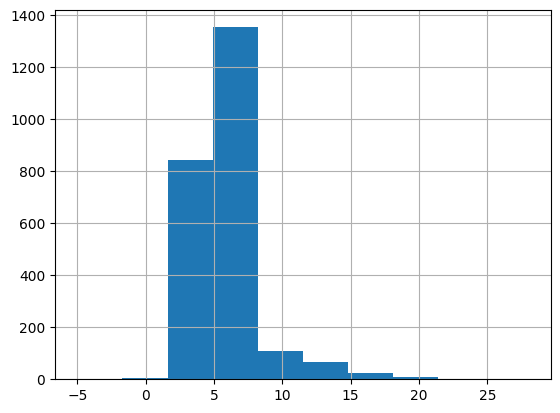

In [ ]:
bmw['edad_coche'].hist()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
 5.0     0.312733
 4.0     0.262547
 6.0     0.179594
 3.0     0.067192
 7.0     0.047698
 8.0     0.021153
 2.0     0.019079
 10.0    0.017420
 9.0     0.016176
 12.0    0.012028
 11.0    0.012028
 13.0    0.011613
 14.0    0.004148
 17.0    0.003318
 15.0    0.003318
 1.0     0.002074
 16.0    0.001659
 21.0    0.001659
 18.0    0.001244
 19.0    0.001244
-1.0     0.000415
-5.0     0.000415
 23.0    0.000415
 28.0    0.000415
 24.0    0.000415
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'year_fecha_venta'}>]], dtype=object)

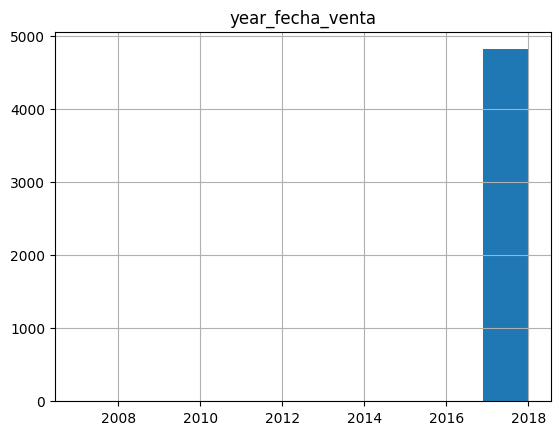

In [ ]:
bmw.hist('year_fecha_venta')

In [ ]:
bmw['year_fecha_venta'].value_counts(normalize=True)

year_fecha_venta
2018.0    0.999170
2007.0    0.000207
2010.0    0.000207
2009.0    0.000207
2008.0    0.000207
Name: proportion, dtype: float64

Podemos eliminar la columna **year_fecha_venta** visto que el dataset se refiere pratcticamente solo a coches vendidos en el 2018

In [ ]:
del bmw['year_fecha_venta']

In [ ]:
bmw[bmw['edad_coche']<0]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
98,320,342768.0,135.0,estate,False,True,False,True,False,NaN,8200.0,4.0,-1.0,1.0
251,316,201102.0,85.0,estate,True,NaN,False,False,False,False,8800.0,6.0,-5.0,1.0


In [ ]:
# eliminamos los registro con edad_coche <0 porqué no tiene sentido

In [ ]:
edad_coche_negativa_idx = bmw[bmw['edad_coche']<0].index

In [ ]:
bmw.drop(edad_coche_negativa_idx,inplace=True)

In [ ]:
bmw.reset_index(drop=True,inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4820 non-null   object 
 1   km                    4820 non-null   float64
 2   potencia              4820 non-null   float64
 3   tipo_coche            4820 non-null   object 
 4   volante_regulable     4820 non-null   object 
 5   aire_acondicionado    4338 non-null   object 
 6   camara_trasera        4820 non-null   object 
 7   elevalunas_electrico  4820 non-null   object 
 8   bluetooth             4095 non-null   object 
 9   alerta_lim_velocidad  4096 non-null   object 
 10  precio                4820 non-null   float64
 11  mes_fecha_venta       4820 non-null   float64
 12  edad_coche            2409 non-null   float64
 13  color_estandar        4820 non-null   float64
dtypes: float64(6), object(8)
memory usage: 527.3+ KB


In [ ]:
# hagamos un estudio para entender como limpiar los nulos de edad_coche

<Axes: >

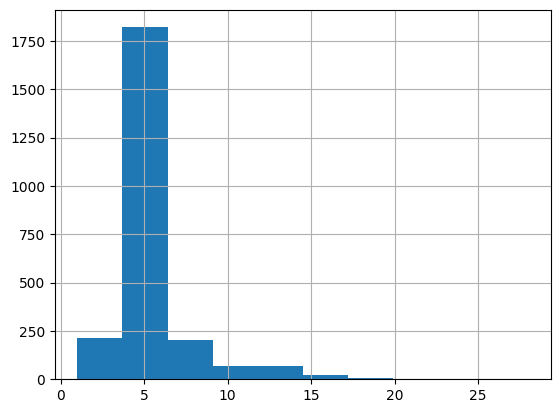

In [ ]:
bmw['edad_coche'].hist()

In [ ]:
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
5.0     0.312993
4.0     0.262765
6.0     0.179743
3.0     0.067248
7.0     0.047738
8.0     0.021171
2.0     0.019095
10.0    0.017435
9.0     0.016189
11.0    0.012038
12.0    0.012038
13.0    0.011623
14.0    0.004151
17.0    0.003321
15.0    0.003321
1.0     0.002076
16.0    0.001660
21.0    0.001660
18.0    0.001245
19.0    0.001245
23.0    0.000415
28.0    0.000415
24.0    0.000415
Name: proportion, dtype: float64

In [ ]:
# hagamos un estudio de la edad por modelo, tipo_coche y potencia

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
bmw.groupby(['modelo'])['edad_coche'].value_counts(normalize=True)

modelo             edad_coche
 Active Tourer     4.0           1.000000
114                5.0           0.600000
                   4.0           0.300000
                   2.0           0.100000
116                5.0           0.445860
                   6.0           0.254777
                   4.0           0.121019
                   3.0           0.057325
                   7.0           0.044586
                   2.0           0.019108
                   9.0           0.012739
                   11.0          0.006369
                   12.0          0.006369
                   1.0           0.006369
                   13.0          0.006369
                   14.0          0.006369
                   10.0          0.006369
                   8.0           0.006369
118                6.0           0.230769
                   5.0           0.200000
                   3.0           0.123077
                   4.0           0.123077
                   12.0          0.076923
    

In [ ]:
bmw.groupby(['modelo','tipo_coche'])['edad_coche'].value_counts(normalize=True)

modelo             tipo_coche   edad_coche
 Active Tourer     van          4.0           1.000000
114                hatchback    5.0           0.666667
                                4.0           0.333333
                   subcompact   5.0           0.500000
                                4.0           0.250000
                                2.0           0.250000
116                estate       3.0           0.500000
                                4.0           0.500000
                   hatchback    5.0           0.450382
                                6.0           0.251908
                                4.0           0.122137
                                7.0           0.053435
                                3.0           0.045802
                                2.0           0.022901
                                9.0           0.015267
                                11.0          0.007634
                                12.0          0.007634
                      

In [ ]:
# un buen nivel de precisión se obtiene agrupando por los tres atributos al mismo tiempo
bmw.groupby(['modelo','tipo_coche','potencia'])['edad_coche'].value_counts(normalize=True)

modelo             tipo_coche   potencia  edad_coche
 Active Tourer     van          100.0     4.0           1.000000
114                hatchback    70.0      5.0           1.000000
                                75.0      5.0           0.600000
                                          4.0           0.400000
                   subcompact   70.0      5.0           0.500000
                                          4.0           0.250000
                                          2.0           0.250000
116                estate       80.0      3.0           1.000000
                                85.0      4.0           1.000000
                   hatchback    80.0      2.0           1.000000
                                85.0      5.0           0.456000
                                          6.0           0.248000
                                          4.0           0.128000
                                          7.0           0.056000
                                     

Notemos que para la mayoría de combinaciones modelo/tipo_coche/potencia, los coches se reparten a lo largo de tres años consecutivos. Entonces para tratar los nulos con más precisión, hacemos grupos de edad que indican la clase de antiguedad del coche y que tengan sentido a nivel de negocio.
- 1-3
- 4-6
- 7-10
- 11-15
- 16-20
- 21-25
- más de 25

Y redefiniendo la columna edad_coche como el atributo che indica a que categoría de edad pertenece el coche

In [ ]:
def get_clase_edad_coche(edad):
  if str(edad) == 'nan':
    return edad
  elif edad in range(1,4):
    return '1-3'
  elif edad in range(4,7):
    return '4-6'
  elif edad in range(7,11):
    return '7-10'
  elif edad in range(11,16):
    return '11-15'
  elif edad in range(16,21):
    return '16-20'
  elif edad in range(21,26):
    return '21-25'
  else:
    return '>25'

In [ ]:
# redefiniendo edad_coche como la clase de edad del coche
bmw['edad_coche'] = bmw['edad_coche'].map(get_clase_edad_coche)

In [ ]:
bmw.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
0,118,140411.0,100.0,hatchback,True,True,False,True,NaN,NaN,11300.0,1.0,4-6,1.0
1,M4,13929.0,317.0,convertible,True,True,False,False,True,True,69700.0,2.0,NaN,1.0
2,320,183297.0,120.0,estate,False,False,False,True,False,False,10200.0,2.0,4-6,0.0
3,420,128035.0,135.0,convertible,True,True,False,True,True,NaN,25100.0,2.0,NaN,0.0
4,425,97097.0,160.0,coupe,True,True,False,False,True,True,33400.0,4.0,NaN,0.0


In [ ]:
# hacemos un estudio para ver como varia la moda de edad_coche diferentes niveles de agrupación

In [ ]:
# moda de todo el dataset
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
4-6      0.755500
7-10     0.102532
1-3      0.088418
11-15    0.043171
16-20    0.007472
21-25    0.002491
>25      0.000415
Name: proportion, dtype: float64

In [ ]:
# moda por modelo
bmw.groupby(['modelo'])['edad_coche'].value_counts(normalize=True)

modelo             edad_coche
 Active Tourer     4-6           1.000000
114                4-6           0.900000
                   1-3           0.100000
116                4-6           0.821656
                   1-3           0.082803
                   7-10          0.070064
                   11-15         0.025478
118                4-6           0.553846
                   11-15         0.153846
                   1-3           0.153846
                   7-10          0.138462
120                4-6           0.666667
                   7-10          0.208333
                   1-3           0.083333
                   11-15         0.041667
125                4-6           1.000000
135                4-6           1.000000
214 Gran Tourer    1-3           1.000000
216 Active Tourer  1-3           1.000000
216 Gran Tourer    1-3           1.000000
218                1-3           0.666667
                   4-6           0.333333
218 Active Tourer  1-3           1.000000
218 

In [ ]:
# moda por modelo y tipo_coche
bmw.groupby(['modelo','tipo_coche'])['edad_coche'].value_counts(normalize=True)

modelo             tipo_coche   edad_coche
 Active Tourer     van          4-6           1.000000
114                hatchback    4-6           1.000000
                   subcompact   4-6           0.750000
                                1-3           0.250000
116                estate       4-6           0.500000
                                1-3           0.500000
                   hatchback    4-6           0.824427
                                7-10          0.076336
                                1-3           0.068702
                                11-15         0.030534
                   subcompact   4-6           0.833333
                                1-3           0.125000
                                7-10          0.041667
118                convertible  7-10          1.000000
                   coupe        4-6           1.000000
                   hatchback    4-6           0.535714
                                1-3           0.178571
                      

In [ ]:
# moda por modelo, tipo_coche y potencia
bmw.groupby(['modelo','tipo_coche','potencia'])['edad_coche'].value_counts(normalize=True)

modelo             tipo_coche   potencia  edad_coche
 Active Tourer     van          100.0     4-6           1.000000
114                hatchback    70.0      4-6           1.000000
                                75.0      4-6           1.000000
                   subcompact   70.0      4-6           0.750000
                                          1-3           0.250000
116                estate       80.0      1-3           1.000000
                                85.0      4-6           1.000000
                   hatchback    80.0      1-3           1.000000
                                85.0      4-6           0.832000
                                          7-10          0.072000
                                          1-3           0.064000
                                          11-15         0.032000
                                87.0      4-6           1.000000
                                90.0      7-10          1.000000
                                100.0

 Reemplazemos los nulos en edad_coche con la moda por modelo, tipo_coche y potencia. Cuando no es posible usemos la moda solo por modelo y tipo_coche. Si tampoco esta existe
 usemos la moda por modelo, e si tampoco esta existe le ponemos la moda de edad_coche por el dataset osea '4-6'

In [ ]:
# guardemos los valores de la moda para edad_coche en tablas diferentes sugun el nivel de agrupación
tabla_moda_edad_coche = bmw[~(bmw['edad_coche'].isnull())].groupby(['modelo','tipo_coche','potencia'])['edad_coche'].agg([stat.mode])

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
tabla_moda_edad_coche

mode
modelo         tipo_coche  potencia       
 Active Tourer van         100.0       4-6
114            hatchback   70.0        4-6
                           75.0        4-6
               subcompact  70.0        4-6
116            estate      80.0        1-3
...                                    ...
X6 M           suv         280.0       1-3
                           423.0       1-3
Z4             convertible 110.0     11-15
i3             hatchback   75.0        4-6
                           125.0       4-6

[289 rows x 1 columns]

In [ ]:
tabla_moda_edad_coche_por_modelo_y_tipo_coche = bmw[~(bmw['edad_coche'].isnull())].groupby(['modelo','tipo_coche'])['edad_coche'].agg([stat.mode])

In [ ]:
tabla_moda_edad_coche_por_modelo_y_tipo_coche

mode
modelo         tipo_coche        
 Active Tourer van            4-6
114            hatchback      4-6
               subcompact     4-6
116            estate         4-6
               hatchback      4-6
...                           ...
X5 M50         suv            4-6
X6             suv           7-10
X6 M           suv            1-3
Z4             convertible  11-15
i3             hatchback      4-6

[115 rows x 1 columns]

In [ ]:
tabla_moda_edad_coche_por_modelo = bmw[~(bmw['edad_coche'].isnull())].groupby(['modelo'])['edad_coche'].agg([stat.mode])

In [ ]:
tabla_moda_edad_coche_por_modelo

,mode
modelo,
Active Tourer,4-6
114,4-6
116,4-6
118,4-6
120,4-6
...,...
X5 M50,4-6
X6,7-10
X6 M,1-3


In [ ]:
# Reemplazemos los nulos en edad_coche con la moda por modelo, tipo_coche y potencia. Cuando no es posible usemos la moda solo por modelo y tipo_coche. Si tampoco esta existe
# usemos la moda por modelo, e si tampoco esta existe le ponemos la moda de edad_coche por el dataset osea '4-6'

for i in bmw[bmw['edad_coche'].isnull()].index:
  modelo = bmw.loc[i,'modelo']
  tipo_coche = bmw.loc[i,'tipo_coche']
  potencia = bmw.loc[i,'potencia']
 # existe la moda por modelo, tipo_coche y potencia?
  if (modelo,tipo_coche,potencia) in tabla_moda_edad_coche.index:
    edad_coche = tabla_moda_edad_coche.loc[(modelo,tipo_coche,potencia)].values[0]
 # si no, existe la moda solo por modelo y tipo_coche?
  elif (modelo,tipo_coche) in tabla_moda_edad_coche_por_modelo_y_tipo_coche.index:
    edad_coche = tabla_moda_edad_coche_por_modelo_y_tipo_coche.loc[(modelo,tipo_coche)].values[0]
 # si no, existe la moda solo por modelo?
  elif (modelo) in tabla_moda_edad_coche_por_modelo.index:
    edad_coche = tabla_moda_edad_coche_por_modelo.loc[(modelo)].values[0]
  else:
    edad_coche = bmw['edad_coche'].mode().values[0]
  bmw.loc[i,'edad_coche'] = edad_coche

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
bluetooth,725,15.041494
alerta_lim_velocidad,724,15.020747
aire_acondicionado,482,10.000000
modelo,0,0.000000
km,0,0.000000
potencia,0,0.000000
tipo_coche,0,0.000000
volante_regulable,0,0.000000
camara_trasera,0,0.000000


In [ ]:
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
4-6      0.810581
7-10     0.070332
1-3      0.069087
11-15    0.040041
16-20    0.008299
21-25    0.001452
>25      0.000207
Name: proportion, dtype: float64

Lo que hemos obtenido según nosotros representa bien la "normalidad" de una concesionaria de coches usados:
- 80% usado normal
- 7% usado nuevo
- 7% usado viejo
- 4% usado muy viejo

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4820 non-null   object 
 1   km                    4820 non-null   float64
 2   potencia              4820 non-null   float64
 3   tipo_coche            4820 non-null   object 
 4   volante_regulable     4820 non-null   object 
 5   aire_acondicionado    4338 non-null   object 
 6   camara_trasera        4820 non-null   object 
 7   elevalunas_electrico  4820 non-null   object 
 8   bluetooth             4095 non-null   object 
 9   alerta_lim_velocidad  4096 non-null   object 
 10  precio                4820 non-null   float64
 11  mes_fecha_venta       4820 non-null   float64
 12  edad_coche            4820 non-null   object 
 13  color_estandar        4820 non-null   float64
dtypes: float64(5), object(9)
memory usage: 527.3+ KB


### **bluetooth**

In [ ]:
pd.to_pickle(bmw,'/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_riprendi_da_qui')

In [ ]:
bmw = pd.read_pickle('/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_riprendi_da_qui')

In [ ]:
bmw['bluetooth'].value_counts(normalize=True)

bluetooth
False    0.757998
True     0.242002
Name: proportion, dtype: float64

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw.groupby(['edad_coche','tipo_coche','modelo','potencia'])['bluetooth'].value_counts(normalize=True)

edad_coche  tipo_coche   modelo             potencia  bluetooth
1-3         convertible  218                100.0     False        0.500000
                                                      True         0.500000
                                            110.0     False        1.000000
                         220                135.0     False        1.000000
                         M4                 317.0     True         1.000000
            coupe        218                100.0     False        1.000000
                                            105.0     False        0.500000
                                                      True         0.500000
                         220                140.0     True         1.000000
                         330                170.0     False        1.000000
                         420                135.0     False        0.500000
                                                      True         0.500000
                        

Remplazemos los nulos con la moda por edad_coche/modelo/tipo_coche/potencia

In [ ]:
tabla_moda_bluetooth = bmw[~(bmw['bluetooth'].isnull())].groupby(['edad_coche','tipo_coche','modelo','potencia'])['bluetooth'].agg([stat.mode])

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
tabla_moda_bluetooth

mode
edad_coche tipo_coche  modelo potencia       
1-3        convertible 218    100.0     False
                              110.0     False
                       220    135.0     False
                       M4     317.0      True
           coupe       218    100.0     False
...                                       ...
7-10       suv         X6     155.0     False
                              173.0     False
                              210.0     False
                              300.0     False
>25        sedan       316    66.0      False

[460 rows x 1 columns]

In [ ]:
tabla_moda_bluetooth_por_edad_coche_y_tipo_coche = bmw[~(bmw['bluetooth'].isnull())].groupby(['edad_coche','tipo_coche'])['bluetooth'].agg([stat.mode])

In [ ]:
tabla_moda_bluetooth_por_edad_coche_y_tipo_coche

mode
edad_coche tipo_coche        
1-3        convertible   True
           coupe         True
           estate       False
           hatchback    False
           sedan         True
...                       ...
7-10       hatchback    False
           sedan        False
           subcompact   False
           suv          False
>25        sedan        False

[39 rows x 1 columns]

In [ ]:
# Reemplazemos los nulos en bluetooth con la moda por edad_coche, tipo_coche, modelo y potencia. Cuando no es posible usemos la moda solo por edad_coche y tipo_coche. Si tampoco esta existe
# usemos la moda del dateset.
for i in bmw[bmw['bluetooth'].isnull()].index:
  edad_coche = bmw.loc[i,'edad_coche']
  tipo_coche = bmw.loc[i,'tipo_coche']
  modelo = bmw.loc[i,'modelo']
  potencia = bmw.loc[i,'potencia']
 # existe la moda por edad_coche, tipo_coche, modelo y potencia?
  if (edad_coche,tipo_coche,modelo,potencia) in tabla_moda_bluetooth.index:
    bluetooth = tabla_moda_bluetooth.loc[(edad_coche,tipo_coche,modelo,potencia)].values[0]
 # si no, existe la moda solo por edad_coche y tipo_coche?
  elif (edad_coche,tipo_coche) in tabla_moda_bluetooth_por_edad_coche_y_tipo_coche.index:
    bluetooth = tabla_moda_bluetooth_por_edad_coche_y_tipo_coche.loc[(edad_coche,tipo_coche)].values[0]
  else:
    bluetooth = ['bluetooth'].mode().values[0]
  bmw.loc[i,'bluetooth'] = bluetooth

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
alerta_lim_velocidad,724,15.020747
aire_acondicionado,482,10.000000
modelo,0,0.000000
km,0,0.000000
potencia,0,0.000000
tipo_coche,0,0.000000
volante_regulable,0,0.000000
camara_trasera,0,0.000000
elevalunas_electrico,0,0.000000


In [ ]:
bmw['bluetooth'].value_counts(normalize=True)

bluetooth
False    0.785685
True     0.214315
Name: proportion, dtype: float64

La distribución no ha cambiado mucho.

### **alerta_lim_velocidad**

Hagamos un estudio para entender la logica de alerta_lim_velocidad

In [ ]:
bmw['alerta_lim_velocidad'].value_counts(normalize=True)

alerta_lim_velocidad
True     0.544189
False    0.455811
Name: proportion, dtype: float64

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw.groupby(['edad_coche'])['alerta_lim_velocidad'].value_counts(normalize=True)

edad_coche  alerta_lim_velocidad
1-3         True                    0.689655
            False                   0.310345
11-15       False                   0.690476
            True                    0.309524
16-20       False                   0.800000
            True                    0.200000
21-25       False                   0.666667
            True                    0.333333
4-6         True                    0.541201
            False                   0.458799
7-10        True                    0.618375
            False                   0.381625
>25         False                   1.000000
Name: proportion, dtype: float64

In [ ]:
bmw.groupby(['tipo_coche'])['alerta_lim_velocidad'].value_counts(normalize=True)

tipo_coche   alerta_lim_velocidad
convertible  False                   0.562500
             True                    0.437500
coupe        True                    0.646341
             False                   0.353659
estate       True                    0.558485
             False                   0.441515
hatchback    False                   0.674757
             True                    0.325243
sedan        True                    0.561424
             False                   0.438576
subcompact   False                   0.956522
             True                    0.043478
suv          True                    0.691290
             False                   0.308710
van          False                   0.578947
             True                    0.421053
Name: proportion, dtype: float64

In [ ]:
bmw.groupby(['edad_coche','tipo_coche'])['alerta_lim_velocidad'].value_counts(normalize=True)

edad_coche  tipo_coche   alerta_lim_velocidad
1-3         convertible  True                    0.833333
                         False                   0.166667
            coupe        False                   0.500000
                         True                    0.500000
            estate       True                    0.707317
                         False                   0.292683
            hatchback    False                   0.543860
                         True                    0.456140
            sedan        True                    0.887097
                         False                   0.112903
            subcompact   False                   1.000000
            suv          True                    0.857143
                         False                   0.142857
            van          False                   0.593750
                         True                    0.406250
11-15       convertible  False                   1.000000
            coupe        T

In [ ]:
# Los verdaderos optionals son alerta_lim_velocidad, elevalunas_electrico y volante_regulable porqué los 3 no tienen una moda que
# destaca realmente en el dataset
for i in ['alerta_lim_velocidad','elevalunas_electrico','volante_regulable']:
  print('\n',bmw[i].value_counts(normalize=True))

# mientras bluetooth, camara_trasera y aire_acondicionado tienen una moda más destacada
for i in ['bluetooth','camara_trasera','aire_acondicionado']:
  print('\n',bmw[i].value_counts(normalize=True))


 alerta_lim_velocidad
True     0.544189
False    0.455811
Name: proportion, dtype: float64

 elevalunas_electrico
False    0.539834
True     0.460166
Name: proportion, dtype: float64

 volante_regulable
True     0.55
False    0.45
Name: proportion, dtype: float64

 bluetooth
False    0.785685
True     0.214315
Name: proportion, dtype: float64

 camara_trasera
False    0.798755
True     0.201245
Name: proportion, dtype: float64

 aire_acondicionado
True     0.795297
False    0.204703
Name: proportion, dtype: float64


In [ ]:
bmw.groupby(['volante_regulable','elevalunas_electrico'])['alerta_lim_velocidad'].value_counts(normalize=True)

volante_regulable  elevalunas_electrico  alerta_lim_velocidad
False              False                 False                   0.659591
                                         True                    0.340409
                   True                  True                    0.609842
                                         False                   0.390158
True               False                 False                   0.551651
                                         True                    0.448349
                   True                  True                    0.781155
                                         False                   0.218845
Name: proportion, dtype: float64

In [ ]:
bmw.groupby(['tipo_coche','volante_regulable','elevalunas_electrico'])['alerta_lim_velocidad'].value_counts(normalize=True)

tipo_coche   volante_regulable  elevalunas_electrico  alerta_lim_velocidad
convertible  False              False                 True                    1.000000
                                True                  False                   1.000000
             True               False                 False                   0.800000
                                                      True                    0.200000
                                True                  True                    0.727273
                                                      False                   0.272727
coupe        False              False                 True                    0.538462
                                                      False                   0.461538
                                True                  True                    0.529412
                                                      False                   0.470588
             True               False                 T

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
#  La mejor caracterización parece que se consigue con esta agrupación
bmw.groupby(['edad_coche','tipo_coche','modelo','potencia','volante_regulable','elevalunas_electrico'])['alerta_lim_velocidad'].value_counts(normalize=True)

edad_coche  tipo_coche   modelo             potencia  volante_regulable  elevalunas_electrico  alerta_lim_velocidad
1-3         convertible  218                100.0     False              False                 True                    1.000000
                                                      True               False                 False                   1.000000
                                            110.0     True               True                  True                    1.000000
                         220                135.0     False              False                 True                    1.000000
                         M4                 317.0     True               False                 True                    1.000000
            coupe        218                100.0     False              True                  False                   1.000000
                                            105.0     False              False                 True                 

In [ ]:
# reemplazemos los nulos en alerta_lim_velocidad con la moda por 'tipo_coche','modelo','potencia','volante_regulable' y 'elevalunas_electrico'
# Cuando no es posible usemos la moda por 'tipo_coche','volante_regulable', y 'elevalunas_electrico'

In [ ]:
tabla_moda_alerta_lim_velocidad = bmw[~(bmw['alerta_lim_velocidad'].isnull())].groupby(['edad_coche','tipo_coche','modelo','potencia','volante_regulable','elevalunas_electrico'])['alerta_lim_velocidad'].agg([stat.mode])

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
tabla_moda_alerta_lim_velocidad

mode
edad_coche tipo_coche  modelo potencia volante_regulable elevalunas_electrico       
1-3        convertible 218    100.0    False             False                  True
                                       True              False                 False
                              110.0    True              True                   True
                       220    135.0    False             False                  True
                       M4     317.0    True              False                  True
...                                                                              ...
7-10       suv         X6     173.0    True              True                   True
                              210.0    True              True                   True
                              225.0    True              True                  False
                              300.0    True              True                   True
>25        sedan       316    66.0     False             False                 False

[802 rows x 1 columns]

In [ ]:
tabla_moda_alerta_lim_velocidad_mas_general = bmw[~(bmw['alerta_lim_velocidad'].isnull())].groupby(['edad_coche','tipo_coche','volante_regulable','elevalunas_electrico'])['alerta_lim_velocidad'].agg([stat.mode])

In [ ]:
tabla_moda_alerta_lim_velocidad_mas_general

mode
edad_coche tipo_coche  volante_regulable elevalunas_electrico       
1-3        convertible False             False                  True
                       True              False                  True
                                         True                   True
           coupe       False             False                  True
                                         True                  False
...                                                              ...
7-10       suv         False             False                  True
                                         True                   True
                       True              False                  True
                                         True                   True
>25        sedan       False             False                 False

[113 rows x 1 columns]

In [ ]:
# reemplazemos los nulos en alerta_lim_velocidad con la moda por 'edad_coche', 'tipo_coche','modelo','potencia','volante_regulable' y 'elevalunas_electrico'.
# Cuando no es posible usemos la moda por 'edad_coche','tipo_coche','volante_regulable', y 'elevalunas_electrico'

for i in bmw[bmw['alerta_lim_velocidad'].isnull()].index:
  edad_coche = bmw.loc[i,'edad_coche']
  tipo_coche = bmw.loc[i,'tipo_coche']
  modelo = bmw.loc[i,'modelo']
  potencia = bmw.loc[i,'potencia']
  volante_regulable = bmw.loc[i,'volante_regulable']
  elevalunas_electrico = bmw.loc[i,'elevalunas_electrico']
 # existe la moda por ''edad_coche,'tipo_coche','modelo','potencia','volante_regulable','elevalunas_electrico'?
  if (edad_coche,tipo_coche,modelo,potencia,volante_regulable,elevalunas_electrico) in tabla_moda_alerta_lim_velocidad.index:
    alerta_lim_velocidad = tabla_moda_alerta_lim_velocidad.loc[(edad_coche,tipo_coche,modelo,potencia,volante_regulable,elevalunas_electrico)].values[0]
 # si no, existe la moda solo por 'edad_coche','tipo_coche','volante_regulable', y 'elevalunas_electrico'?
  elif (edad_coche,tipo_coche,volante_regulable,elevalunas_electrico) in tabla_moda_alerta_lim_velocidad_mas_general.index:
    alerta_lim_velocidad = tabla_moda_alerta_lim_velocidad_mas_general.loc[(edad_coche,tipo_coche,volante_regulable,elevalunas_electrico)].values[0]

  bmw.loc[i,'alerta_lim_velocidad'] = alerta_lim_velocidad

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
aire_acondicionado,482,10.0
modelo,0,0.0
km,0,0.0
potencia,0,0.0
tipo_coche,0,0.0
volante_regulable,0,0.0
camara_trasera,0,0.0
elevalunas_electrico,0,0.0
bluetooth,0,0.0


In [ ]:
bmw['alerta_lim_velocidad'].value_counts(normalize=True)

alerta_lim_velocidad
True     0.539212
False    0.460788
Name: proportion, dtype: float64

La distribución **ha quedado igual**, buena signal

### **aire_acondicionado**

Hagamos un estudio para entender la logica de la variable

In [ ]:
bmw['aire_acondicionado'].value_counts(normalize=True)

aire_acondicionado
True     0.795297
False    0.204703
Name: proportion, dtype: float64

In [ ]:
bmw.groupby(['edad_coche'])['aire_acondicionado'].value_counts(normalize=True)

edad_coche  aire_acondicionado
1-3         True                  0.895973
            False                 0.104027
11-15       True                  0.554913
            False                 0.445087
16-20       False                 0.857143
            True                  0.142857
21-25       False                 0.800000
            True                  0.200000
4-6         True                  0.807703
            False                 0.192297
7-10        True                  0.776271
            False                 0.223729
>25         False                 1.000000
Name: proportion, dtype: float64

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw[bmw['aire_acondicionado'].isnull()]['edad_coche'].value_counts(normalize=False)

edad_coche
4-6      376
7-10      44
1-3       35
11-15     20
16-20      5
21-25      2
Name: count, dtype: int64

In [ ]:
bmw.groupby(['edad_coche','tipo_coche'])['aire_acondicionado'].value_counts(normalize=True)

edad_coche  tipo_coche   aire_acondicionado
1-3         convertible  True                  1.000000
            coupe        True                  0.846154
                         False                 0.153846
            estate       True                  0.816327
                         False                 0.183673
            hatchback    True                  0.950000
                         False                 0.050000
            sedan        True                  0.966667
                         False                 0.033333
            subcompact   True                  0.750000
                         False                 0.250000
            suv          True                  0.897436
                         False                 0.102564
            van          True                  0.793103
                         False                 0.206897
11-15       convertible  False                 1.000000
            coupe        False                 0.500000
    

In [ ]:
bmw.groupby(['edad_coche','tipo_coche','modelo'])['aire_acondicionado'].value_counts(normalize=True)

edad_coche  tipo_coche   modelo             aire_acondicionado
1-3         convertible  218                True                  1.000000
                         M4                 True                  1.000000
            coupe        218                True                  0.666667
                                            False                 0.333333
                         220                True                  1.000000
                         330                True                  1.000000
                         420                True                  0.800000
                                            False                 0.200000
                         430 Gran Coupé     True                  1.000000
                         435 Gran Coupé     True                  1.000000
            estate       116                False                 1.000000
                         316                True                  1.000000
                         318         

In [ ]:
bmw.groupby(['edad_coche','tipo_coche','modelo','potencia'])['aire_acondicionado'].value_counts(normalize=True)

edad_coche  tipo_coche   modelo             potencia  aire_acondicionado
1-3         convertible  218                100.0     True                  1.000000
                                            110.0     True                  1.000000
                         M4                 317.0     True                  1.000000
            coupe        218                100.0     True                  1.000000
                                            105.0     False                 0.500000
                                                      True                  0.500000
                         220                140.0     True                  1.000000
                         330                170.0     True                  1.000000
                         420                135.0     True                  1.000000
                                            140.0     True                  0.666667
                                                      False                 0

In [ ]:
tabla_moda_aire_acondicionado = bmw[~(bmw['aire_acondicionado'].isnull())].groupby(['edad_coche','tipo_coche','modelo','potencia'])['aire_acondicionado'].agg([stat.mode])

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
tabla_moda_aire_acondicionado

mode
edad_coche tipo_coche  modelo potencia       
1-3        convertible 218    100.0      True
                              110.0      True
                       M4     317.0      True
           coupe       218    100.0      True
                              105.0      True
...                                       ...
7-10       suv         X6     173.0      True
                              210.0      True
                              225.0      True
                              300.0      True
>25        sedan       316    66.0      False

[461 rows x 1 columns]

In [ ]:
tabla_moda_aire_acondicionado_por_edad_coche_y_tipo_coche = bmw[~(bmw['aire_acondicionado'].isnull())].groupby(['edad_coche','tipo_coche'])['aire_acondicionado'].agg([stat.mode])

In [ ]:
tabla_moda_aire_acondicionado_por_edad_coche_y_tipo_coche

mode
edad_coche tipo_coche        
1-3        convertible   True
           coupe         True
           estate        True
           hatchback     True
           sedan         True
...                       ...
7-10       estate        True
           hatchback    False
           sedan         True
           suv           True
>25        sedan        False

[38 rows x 1 columns]

In [ ]:
# Reemplazemos los nulos en aire_acondicionado con la moda por edad_coche, tipo_coche, modelo y potencia.
# Cuando no es posible uso la moda solo por edad_coche y tipo_coche.
for i in bmw[bmw['aire_acondicionado'].isnull()].index:
  edad_coche = bmw.loc[i,'edad_coche']
  tipo_coche = bmw.loc[i,'tipo_coche']
  modelo = bmw.loc[i,'modelo']
  potencia = bmw.loc[i,'potencia']
 # existe la moda por edad_coche, tipo_coche, modelo y potencia?
  if (edad_coche,tipo_coche,modelo,potencia) in tabla_moda_aire_acondicionado.index:
    aire_acondicionado = tabla_moda_aire_acondicionado.loc[(edad_coche,tipo_coche,modelo,potencia)].values[0]
 # si no, existe la moda solo por edad_coche y tipo_coche?
  elif (edad_coche,tipo_coche) in tabla_moda_aire_acondicionado_por_edad_coche_y_tipo_coche.index:
    aire_acondicionado = tabla_moda_aire_acondicionado_por_edad_coche_y_tipo_coche.loc[(edad_coche,tipo_coche)].values[0]

  bmw.loc[i,'aire_acondicionado'] = aire_acondicionado

In [ ]:
get_tabla_nulos(bmw)

,nulos,% nulos
columna,,
modelo,0,0.0
km,0,0.0
potencia,0,0.0
tipo_coche,0,0.0
volante_regulable,0,0.0
aire_acondicionado,0,0.0
camara_trasera,0,0.0
elevalunas_electrico,0,0.0
bluetooth,0,0.0


In [ ]:
bmw['aire_acondicionado'].value_counts(normalize=True) # distribucion despues de tratar los nulos

aire_acondicionado
True     0.807884
False    0.192116
Name: proportion, dtype: float64

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4820 non-null   object 
 1   km                    4820 non-null   float64
 2   potencia              4820 non-null   float64
 3   tipo_coche            4820 non-null   object 
 4   volante_regulable     4820 non-null   object 
 5   aire_acondicionado    4820 non-null   object 
 6   camara_trasera        4820 non-null   object 
 7   elevalunas_electrico  4820 non-null   object 
 8   bluetooth             4820 non-null   object 
 9   alerta_lim_velocidad  4820 non-null   object 
 10  precio                4820 non-null   float64
 11  mes_fecha_venta       4820 non-null   float64
 12  edad_coche            4820 non-null   object 
 13  color_estandar        4820 non-null   float64
dtypes: float64(5), object(9)
memory usage: 527.3+ KB


## **03 - ANALISIS UNIVARIABLE**

Hagamos un estudio para entender mejor la logica de cada variable del dataset

In [ ]:
bmw.describe()

,km,potencia,precio,mes_fecha_venta,color_estandar
count,4.820000e+03,4820.000000,4820.000000,4820.000000,4820.000000
mean,1.408740e+05,128.979253,15838.091286,4.932988,0.753734
std,6.016683e+04,38.992978,9224.232394,2.155568,0.430880
min,-6.400000e+01,0.000000,100.000000,1.000000,0.000000
25%,1.027522e+05,100.000000,10875.000000,3.000000,1.000000
50%,1.409475e+05,120.000000,14200.000000,5.000000,1.000000
75%,1.751848e+05,135.000000,18600.000000,7.000000,1.000000
max,1.000376e+06,423.000000,178500.000000,9.000000,1.000000


In [ ]:
pd.set_option('display.max_rows',None)


 modelo
320                  0.154979
520                  0.130705
318                  0.117220
X3                   0.090664
116                  0.074274
X1                   0.056846
316                  0.048133
X5                   0.047925
525                  0.037759
530                  0.032573
118                  0.029668
318 Gran Turismo     0.020124
320 Gran Turismo     0.015145
518                  0.013693
X4                   0.009544
535                  0.009336
X6                   0.009129
420                  0.008921
120                  0.007469
420 Gran Coupé       0.006846
330                  0.006846
730                  0.006846
520 Gran Turismo     0.004772
325                  0.003942
640 Gran Coupé       0.003942
740                  0.003734
530 Gran Turismo     0.003734
X5 M                 0.003527
114                  0.003112
218 Active Tourer    0.002697
M550                 0.002490
218                  0.002490
218 Gran Tourer      0.001867
X

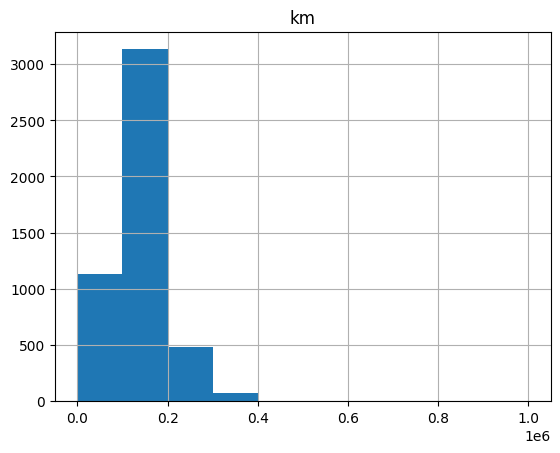

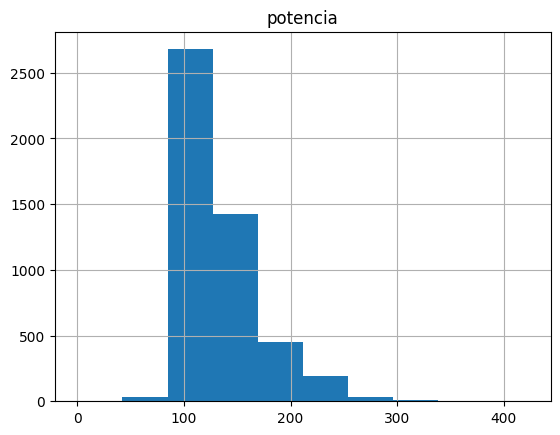

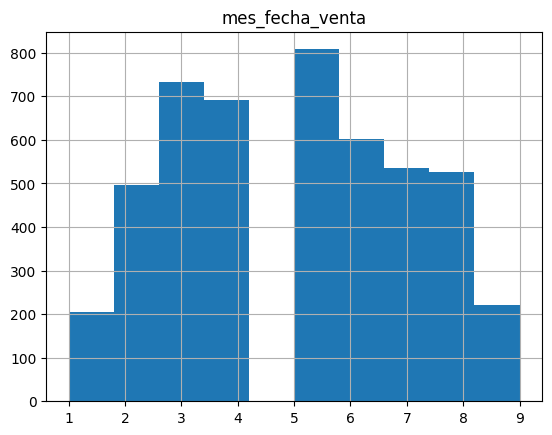

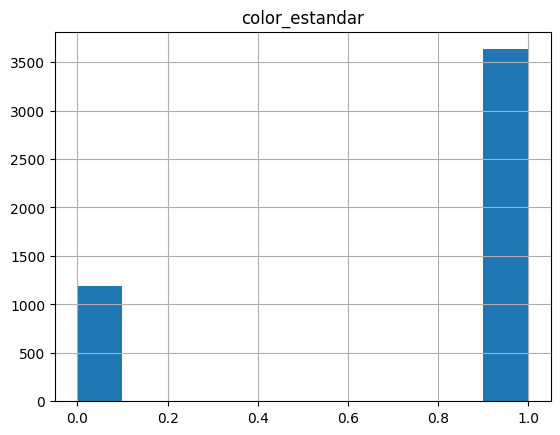

In [ ]:
for i in bmw:
  if i == 'precio':
    continue
  elif bmw[i].dtype.kind in ['f','i']:
    print('\n',bmw.hist(i))
    if i == 'color_estandar':
      print('\n',bmw[i].value_counts(normalize=True))
  else:
    print('\n',bmw[i].value_counts(normalize=True))

A continuación hacemos un estudio de cada variable más en detalle, para ver si hay que limpiarlas

### **tipo_coche**

In [ ]:
bmw['tipo_coche'].value_counts(normalize=True).reset_index('tipo_coche').set_index('tipo_coche')

,proportion
tipo_coche,
estate,0.356639
suv,0.219710
sedan,0.216805
hatchback,0.152905
coupe,0.020332
subcompact,0.017012
van,0.008506
convertible,0.008091


Decidemos eliminar los tipos de coches poco representativos, que tienen una proporción en el dataset menor del 1%

In [ ]:
# esta funcion genera una tabla con la distribucion % de los valores unicos de una determinada columna en un dataset
def get_distribution_table(dataset,col):
  distribution_table = dataset[col].value_counts(normalize=True).reset_index()
  distribution_table.set_index(col,inplace=True)
  return distribution_table


In [ ]:
get_distribution_table(bmw,'tipo_coche')

,proportion
tipo_coche,
estate,0.356639
suv,0.219710
sedan,0.216805
hatchback,0.152905
coupe,0.020332
subcompact,0.017012
van,0.008506
convertible,0.008091


In [ ]:
# esta funcion elimina los valores unicos que tienen una distribucion % < de un cierto umbral en una determinada columna de un dataset
def elimina_categorias(dataset,col,umbral):
  distribution_table = get_distribution_table(dataset,col)
  for i in distribution_table.index:
    if (distribution_table['proportion'][i] < umbral):
      drop_list = dataset[dataset[col]==i].index
      dataset.drop(drop_list,inplace=True)
      dataset.reset_index(drop=True, inplace=True)
    else:
      continue

In [ ]:
elimina_categorias(bmw,'tipo_coche',0.01)

In [ ]:
bmw['tipo_coche'].value_counts(normalize=True)

tipo_coche
estate        0.362658
suv           0.223418
sedan         0.220464
hatchback     0.155485
coupe         0.020675
subcompact    0.017300
Name: proportion, dtype: float64

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4740 non-null   object 
 1   km                    4740 non-null   float64
 2   potencia              4740 non-null   float64
 3   tipo_coche            4740 non-null   object 
 4   volante_regulable     4740 non-null   object 
 5   aire_acondicionado    4740 non-null   object 
 6   camara_trasera        4740 non-null   object 
 7   elevalunas_electrico  4740 non-null   object 
 8   bluetooth             4740 non-null   object 
 9   alerta_lim_velocidad  4740 non-null   object 
 10  precio                4740 non-null   float64
 11  mes_fecha_venta       4740 non-null   float64
 12  edad_coche            4740 non-null   object 
 13  color_estandar        4740 non-null   float64
dtypes: float64(5), object(9)
memory usage: 518.6+ KB


### **edad_coche**

In [ ]:
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
4-6      0.821308
7-10     0.068354
1-3      0.061392
11-15    0.039451
16-20    0.008017
21-25    0.001266
>25      0.000211
Name: proportion, dtype: float64

Eliminemos las clases de edad poco representativas que tienen una proporción en el dataset menor del 1%

In [ ]:
elimina_categorias(bmw,'edad_coche',0.01)

In [ ]:
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
4-6      0.829180
7-10     0.069010
1-3      0.061981
11-15    0.039830
Name: proportion, dtype: float64

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4695 non-null   object 
 1   km                    4695 non-null   float64
 2   potencia              4695 non-null   float64
 3   tipo_coche            4695 non-null   object 
 4   volante_regulable     4695 non-null   object 
 5   aire_acondicionado    4695 non-null   object 
 6   camara_trasera        4695 non-null   object 
 7   elevalunas_electrico  4695 non-null   object 
 8   bluetooth             4695 non-null   object 
 9   alerta_lim_velocidad  4695 non-null   object 
 10  precio                4695 non-null   float64
 11  mes_fecha_venta       4695 non-null   float64
 12  edad_coche            4695 non-null   object 
 13  color_estandar        4695 non-null   float64
dtypes: float64(5), object(9)
memory usage: 513.6+ KB


### **modelo**

In [ ]:
len(bmw['modelo'].unique())

63

In [ ]:
bmw['modelo'].value_counts(normalize=True)

modelo
320                 0.156337
520                 0.132481
318                 0.118211
X3                  0.093078
116                 0.076251
X1                  0.058147
X5                  0.048775
316                 0.048562
525                 0.037061
530                 0.032801
118                 0.030245
318 Gran Turismo    0.020660
320 Gran Turismo    0.015335
518                 0.014058
X4                  0.009798
535                 0.009585
X6                  0.009372
420                 0.008307
420 Gran Coupé      0.007029
730                 0.007029
330                 0.006816
120                 0.006177
520 Gran Turismo    0.004899
640 Gran Coupé      0.004047
740                 0.003834
530 Gran Turismo    0.003834
X5 M                0.003621
325                 0.003408
114                 0.003195
M550                0.002556
X6 M                0.001704
418 Gran Coupé      0.001704
640                 0.001491
M3                  0.001491
335    

In [ ]:
model_distribution_table = get_distribution_table(bmw,'modelo')

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
model_distribution_table

,proportion
modelo,
320,0.156337
520,0.132481
318,0.118211
X3,0.093078
116,0.076251
...,...
735,0.000213
M135,0.000213
635,0.000213


In [ ]:
model_distribution_table[model_distribution_table['proportion']<0.01]['proportion'].sum()

0.11799787007454739

Decidemos agrupar todos los modelos menos frecuentes en una categoría "OTROS MODELOS"

In [ ]:
# esta fucion agrupa los modelos con una distribucion % < de un umbral en una nueva categoria 'OTROS MODELOS'
def agrupa_modelos(dataset,umbral):
  model_distribution_table = get_distribution_table(dataset,'modelo')
  lista_modelos = []
  for i in model_distribution_table.index:
    if model_distribution_table.loc[i,'proportion']>=umbral:
      lista_modelos.append(i)
  def model_mapping(m):
    if m in lista_modelos:
      return m
    else:
      return 'OTROS MODELOS'
  dataset['modelo'] = dataset['modelo'].map(model_mapping)


In [ ]:
agrupa_modelos(bmw,0.01)

In [ ]:
bmw['modelo'].value_counts(normalize=True)

modelo
320                 0.156337
520                 0.132481
318                 0.118211
OTROS MODELOS       0.117998
X3                  0.093078
116                 0.076251
X1                  0.058147
X5                  0.048775
316                 0.048562
525                 0.037061
530                 0.032801
118                 0.030245
318 Gran Turismo    0.020660
320 Gran Turismo    0.015335
518                 0.014058
Name: proportion, dtype: float64

In [ ]:
len(bmw['modelo'].unique())

15

### **km**

In [ ]:
bmw.describe()

,km,potencia,precio,mes_fecha_venta,color_estandar
count,4.695000e+03,4695.000000,4695.000000,4695.000000,4695.000000
mean,1.403712e+05,129.268797,15976.017039,4.922684,0.755272
std,5.817556e+04,38.896070,9146.725202,2.157069,0.429972
min,-6.400000e+01,0.000000,100.000000,1.000000,0.000000
25%,1.033305e+05,100.000000,10900.000000,3.000000,1.000000
50%,1.408140e+05,120.000000,14300.000000,5.000000,1.000000
75%,1.746835e+05,135.000000,18800.000000,7.000000,1.000000
max,1.000376e+06,423.000000,178500.000000,9.000000,1.000000


array([[<Axes: title={'center': 'km'}>]], dtype=object)

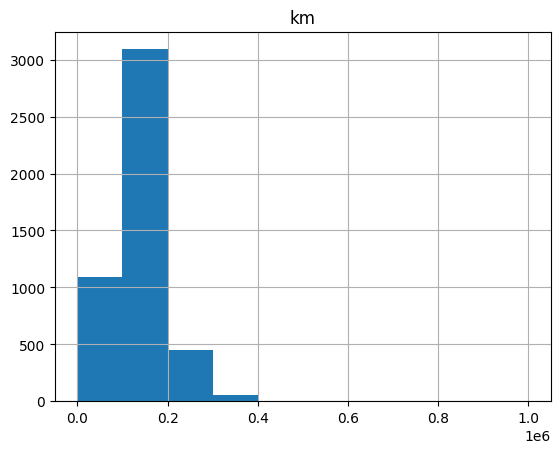

In [ ]:
bmw.hist('km')

<Axes: xlabel='km'>

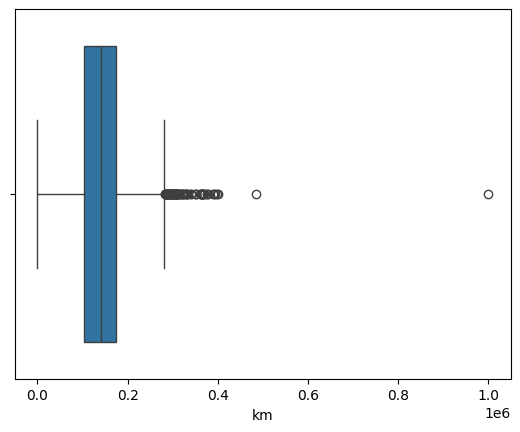

In [ ]:
sns.boxplot(bmw,x='km')

In [ ]:
bmw[bmw['km']<0]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
2850,OTROS MODELOS,-64.0,230.0,sedan,True,True,False,False,False,True,75000.0,4.0,1-3,1.0


In [ ]:
# elimino los registros con km<0 porqué no tiene sentido un numero negativo en ese campo
bmw.drop(bmw[bmw['km']<0].index, inplace=True)

In [ ]:
bmw.reset_index(drop=True,inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4694 entries, 0 to 4693
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4694 non-null   object 
 1   km                    4694 non-null   float64
 2   potencia              4694 non-null   float64
 3   tipo_coche            4694 non-null   object 
 4   volante_regulable     4694 non-null   object 
 5   aire_acondicionado    4694 non-null   object 
 6   camara_trasera        4694 non-null   object 
 7   elevalunas_electrico  4694 non-null   object 
 8   bluetooth             4694 non-null   object 
 9   alerta_lim_velocidad  4694 non-null   object 
 10  precio                4694 non-null   float64
 11  mes_fecha_venta       4694 non-null   float64
 12  edad_coche            4694 non-null   object 
 13  color_estandar        4694 non-null   float64
dtypes: float64(5), object(9)
memory usage: 513.5+ KB


In [ ]:
# localizemos precisamente los outliers
# el limite inferior de los outliers es menor de zero. Como no tiene sentido un numero de km negativo, calculemos solo el limite superior


In [ ]:
q1_km = bmw['km'].quantile(0.25)
q3_km = bmw['km'].quantile(0.75)
iqr_km = q3_km - q1_km
lim_sup_km = q3_km + 1.5*iqr_km
print(q1_km,q3_km,iqr_km)
print(f'lim_sup_km: {lim_sup_km}')



103331.25 174686.75 71355.5
lim_sup_km: 281720.0


In [ ]:
bmw[bmw['km']>lim_sup_km]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
20,320,329173.0,110.0,estate,True,False,False,False,False,True,2300.0,8.0,11-15,0.0
131,320,302525.0,100.0,estate,False,False,False,False,False,False,1000.0,9.0,4-6,1.0
211,318,319724.0,90.0,estate,True,False,False,False,False,False,3000.0,1.0,11-15,1.0
394,525,316855.0,150.0,sedan,True,True,True,True,False,False,9400.0,4.0,7-10,1.0
402,320,309641.0,135.0,estate,True,True,False,True,False,True,10400.0,2.0,4-6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,X1,290306.0,105.0,suv,True,True,False,True,False,True,14000.0,7.0,4-6,0.0
4511,OTROS MODELOS,295953.0,225.0,suv,True,True,True,True,False,False,22000.0,7.0,7-10,1.0
4536,OTROS MODELOS,296257.0,225.0,suv,True,True,True,True,False,True,22000.0,8.0,4-6,1.0
4617,X5,364547.0,261.0,suv,True,True,True,True,False,True,11300.0,8.0,11-15,1.0


In [ ]:
bmw[bmw['km']>lim_sup_km]['edad_coche'].value_counts(normalize=True)

edad_coche
11-15    0.382716
4-6      0.358025
7-10     0.259259
Name: proportion, dtype: float64

In [ ]:
len(bmw[bmw['km']>lim_sup_km])/len(bmw)*100

1.7256071580741372

In [ ]:
bmw[bmw['km']>0.4*1e6]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
496,520,484615.0,120.0,estate,True,True,False,False,False,False,8300.0,3.0,7-10,1.0
1499,320,400654.0,110.0,estate,False,False,True,False,False,False,1800.0,7.0,11-15,1.0
3627,118,1000376.0,90.0,hatchback,True,False,False,False,False,False,1400.0,6.0,11-15,1.0


In [ ]:
# decidemos eliminar solo los registros con km > 400mil porqué esos representan de verdad casos un poco anomalos, mientras que los restantes registros que serian outliers
# en realidad tienen sentido porque la mayoria son coches de edad entre 7 y 10 años
bmw.drop(bmw[bmw['km']>0.4*1e6].index,inplace=True)
bmw.reset_index(drop=True, inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4691 non-null   object 
 1   km                    4691 non-null   float64
 2   potencia              4691 non-null   float64
 3   tipo_coche            4691 non-null   object 
 4   volante_regulable     4691 non-null   object 
 5   aire_acondicionado    4691 non-null   object 
 6   camara_trasera        4691 non-null   object 
 7   elevalunas_electrico  4691 non-null   object 
 8   bluetooth             4691 non-null   object 
 9   alerta_lim_velocidad  4691 non-null   object 
 10  precio                4691 non-null   float64
 11  mes_fecha_venta       4691 non-null   float64
 12  edad_coche            4691 non-null   object 
 13  color_estandar        4691 non-null   float64
dtypes: float64(5), object(9)
memory usage: 513.2+ KB


In [ ]:
bmw['km'].describe()

count      4691.000000
mean     140088.980814
std       56441.001159
min         476.000000
25%      103330.500000
50%      140752.000000
75%      174636.000000
max      398043.000000
Name: km, dtype: float64

array([[<Axes: title={'center': 'km'}>]], dtype=object)

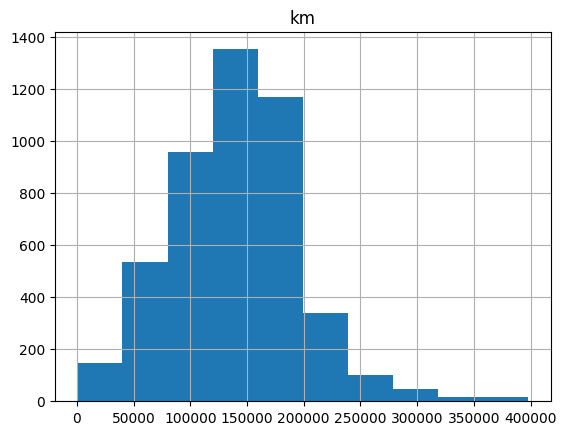

In [ ]:
bmw.hist('km')

### **potencia**

In [ ]:
bmw['potencia'].describe()

count    4691.000000
mean      129.261778
std        38.879362
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

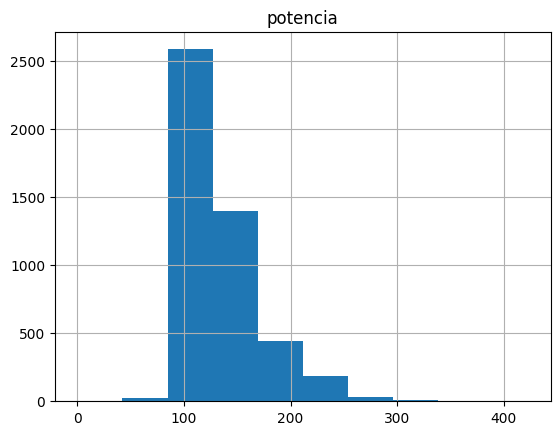

In [ ]:
bmw.hist('potencia')

<Axes: xlabel='potencia'>

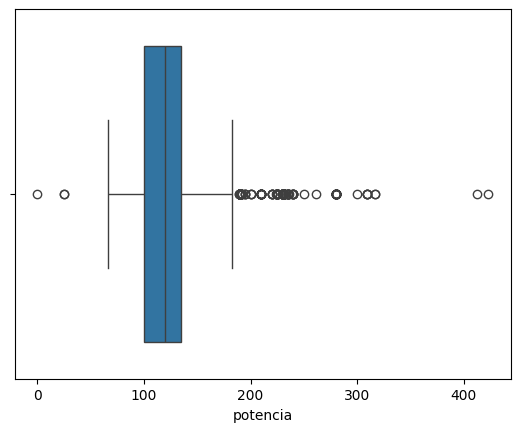

In [ ]:
sns.boxplot(bmw,x='potencia')

In [ ]:
bmw[bmw['potencia']<1]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
3657,X1,81770.0,0.0,suv,False,False,False,False,False,False,11700.0,3.0,4-6,0.0


Hay un modelo con potencia igual a zero, que no tiene sentido. Intentemos de encontrar un valor de potencia adecuado para afectarle: siendo un suv X1 de edad entre 4 y 6 años, hacemos un analisis de las potencias disponibles para un coche con esas caracteristicas.

In [ ]:
bmw.groupby(['modelo','tipo_coche','edad_coche']).get_group(('X1','suv','4-6'))['potencia'].value_counts(normalize=True)

potencia
105.0    0.352
100.0    0.208
85.0     0.140
135.0    0.128
120.0    0.124
160.0    0.036
0.0      0.004
137.0    0.004
130.0    0.004
Name: proportion, dtype: float64

No hay una moda bien marcada. Al ser un solo registro, lo eliminemos.

In [ ]:
bmw.drop(bmw[bmw['potencia']<1].index,inplace=True)

In [ ]:
bmw.reset_index(drop=True,inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4690 non-null   object 
 1   km                    4690 non-null   float64
 2   potencia              4690 non-null   float64
 3   tipo_coche            4690 non-null   object 
 4   volante_regulable     4690 non-null   object 
 5   aire_acondicionado    4690 non-null   object 
 6   camara_trasera        4690 non-null   object 
 7   elevalunas_electrico  4690 non-null   object 
 8   bluetooth             4690 non-null   object 
 9   alerta_lim_velocidad  4690 non-null   object 
 10  precio                4690 non-null   float64
 11  mes_fecha_venta       4690 non-null   float64
 12  edad_coche            4690 non-null   object 
 13  color_estandar        4690 non-null   float64
dtypes: float64(5), object(9)
memory usage: 513.1+ KB


array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

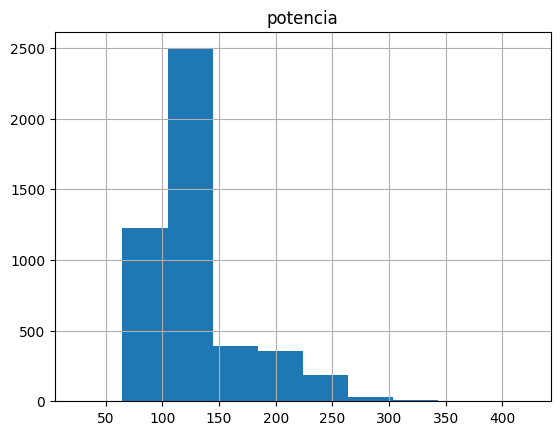

In [ ]:
bmw.hist('potencia')

<Axes: xlabel='potencia'>

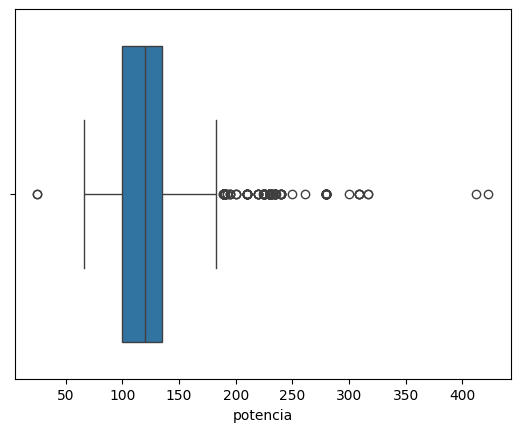

In [ ]:
sns.boxplot(bmw,x='potencia')

En la columna potencia hay outliers. Vamos hacer un analisis más en detalle.

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bmw['potencia'].value_counts(normalize=False).reset_index().sort_values(by='potencia')

,potencia,count
40,25.0,2
52,66.0,1
22,70.0,10
24,75.0,9
33,80.0,4
2,85.0,607
26,87.0,6
15,90.0,39
37,95.0,3
3,100.0,543


In [ ]:
bmw.query('potencia<85')

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,mes_fecha_venta,edad_coche,color_estandar
1065,116,22871.0,80.0,estate,True,False,False,False,False,False,13600.0,5.0,1-3,1.0
1718,OTROS MODELOS,152328.0,25.0,hatchback,False,True,False,False,False,True,20300.0,4.0,4-6,1.0
1726,OTROS MODELOS,179307.0,70.0,hatchback,False,True,False,False,False,False,8300.0,7.0,4-6,1.0
1769,OTROS MODELOS,100398.0,70.0,hatchback,False,True,False,False,True,False,10700.0,2.0,4-6,0.0
1817,OTROS MODELOS,26542.0,75.0,hatchback,False,True,False,False,False,True,20900.0,2.0,4-6,1.0
1847,OTROS MODELOS,152470.0,25.0,hatchback,False,True,False,False,False,True,15500.0,3.0,4-6,1.0
1905,OTROS MODELOS,57344.0,70.0,subcompact,False,True,False,False,False,False,11800.0,3.0,4-6,1.0
1910,OTROS MODELOS,150373.0,70.0,hatchback,False,True,False,False,False,False,8200.0,3.0,4-6,0.0
1923,OTROS MODELOS,72527.0,70.0,subcompact,False,False,False,False,False,False,9300.0,3.0,4-6,0.0
1997,116,42273.0,80.0,hatchback,False,False,False,False,False,False,13400.0,4.0,1-3,1.0


In [ ]:
bmw.query('potencia<85')['modelo'].value_counts(normalize=True)

modelo
OTROS MODELOS    0.769231
116              0.153846
318              0.038462
316              0.038462
Name: proportion, dtype: float64

In [ ]:
bmw[bmw['modelo']=='318']['potencia'].value_counts()

potencia
100.0    307
105.0    211
90.0      22
110.0      6
85.0       4
95.0       1
66.0       1
87.0       1
101.0      1
107.0      1
Name: count, dtype: int64

In [ ]:
bmw.query('potencia>230')['modelo'].value_counts(normalize=True)

modelo
OTROS MODELOS    0.864407
X5               0.135593
Name: proportion, dtype: float64

La mayoría de los outliers de la columna potencia tienen sentido porqué pertenecen a modelos/tipologías específicas de vehículos que tienen esa potencia. De todas formas, en los extremos de la distribución hay valores un poco raros que son dificiles de justificar y/o tienen una sola observación. Por lo tanto, solo eliminemos esos registros.


In [ ]:
bmw.drop(bmw[bmw['potencia']<70].index,inplace=True)

In [ ]:
bmw.drop(bmw[bmw['potencia']>317].index,inplace=True)

In [ ]:
bmw.reset_index(drop=True,inplace=True)

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

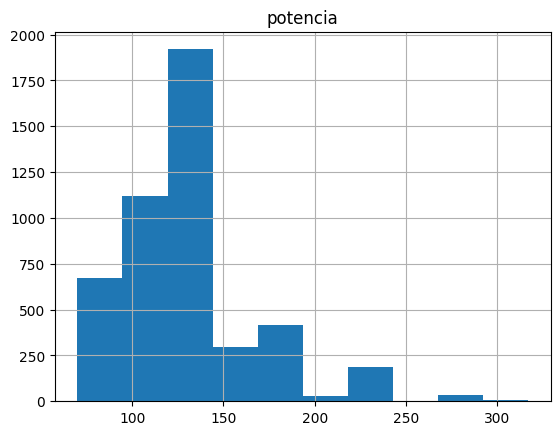

In [ ]:
bmw.hist('potencia')

<Axes: xlabel='potencia'>

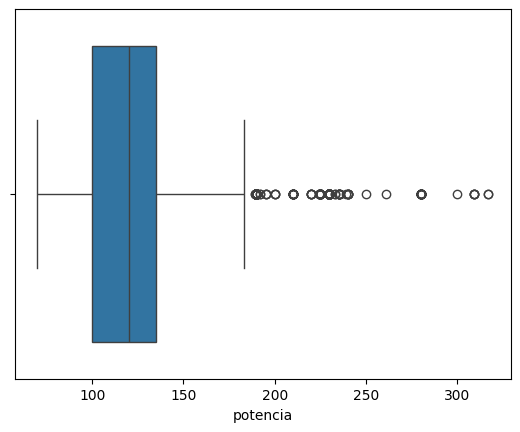

In [ ]:
sns.boxplot(bmw, x='potencia')

In [ ]:
bmw['potencia'].describe()

count    4685.000000
mean      129.224333
std        38.327394
min        70.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       317.000000
Name: potencia, dtype: float64

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4685 non-null   object 
 1   km                    4685 non-null   float64
 2   potencia              4685 non-null   float64
 3   tipo_coche            4685 non-null   object 
 4   volante_regulable     4685 non-null   object 
 5   aire_acondicionado    4685 non-null   object 
 6   camara_trasera        4685 non-null   object 
 7   elevalunas_electrico  4685 non-null   object 
 8   bluetooth             4685 non-null   object 
 9   alerta_lim_velocidad  4685 non-null   object 
 10  precio                4685 non-null   float64
 11  mes_fecha_venta       4685 non-null   float64
 12  edad_coche            4685 non-null   object 
 13  color_estandar        4685 non-null   float64
dtypes: float64(5), object(9)
memory usage: 512.5+ KB


### **mes_fecha_venta**

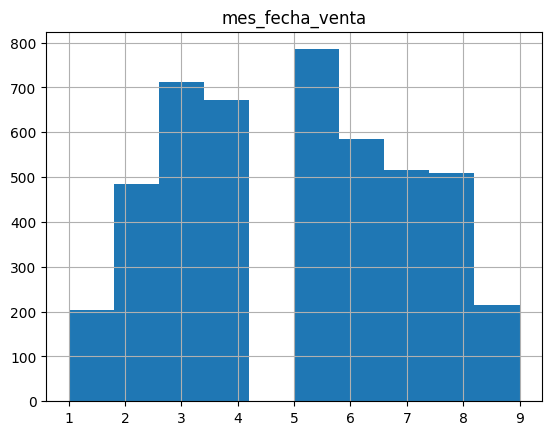

In [ ]:
bmw.hist('mes_fecha_venta');

In [ ]:
bmw['mes_fecha_venta'].value_counts(normalize=True)

mes_fecha_venta
5.0    0.167556
3.0    0.152188
4.0    0.143436
6.0    0.125080
7.0    0.110139
8.0    0.108645
2.0    0.103522
9.0    0.045891
1.0    0.043543
Name: proportion, dtype: float64


Notemos que las ventas solo van de Enero a Septiembre. Como no tenemos datos para todos los meses de el año, si entrenamos el modelo con esa columna en el dataset, en la predicción no sabría que hacer si el mes de venta está entre octubre y diciembre.

Por eso **eliminemos la columna**

In [ ]:
del bmw['mes_fecha_venta']

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4685 non-null   object 
 1   km                    4685 non-null   float64
 2   potencia              4685 non-null   float64
 3   tipo_coche            4685 non-null   object 
 4   volante_regulable     4685 non-null   object 
 5   aire_acondicionado    4685 non-null   object 
 6   camara_trasera        4685 non-null   object 
 7   elevalunas_electrico  4685 non-null   object 
 8   bluetooth             4685 non-null   object 
 9   alerta_lim_velocidad  4685 non-null   object 
 10  precio                4685 non-null   float64
 11  edad_coche            4685 non-null   object 
 12  color_estandar        4685 non-null   float64
dtypes: float64(4), object(9)
memory usage: 475.9+ KB


# **PREPROCESAMIENTO**

### **04 - Analisis de correlaciones entre variables**

Transformemos las columnas de optionals en formato numerico

In [ ]:
for i in bmw:
  if (i not in ['modelo','tipo_coche','edad_coche']) and (bmw[i].dtype.kind=='O'):
    bmw[i] = np.where(bmw[i]==True,1,0)

In [ ]:
bmw['color_estandar']=bmw['color_estandar'].astype(int)

In [ ]:
bmw.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar
0,118,140411.0,100.0,hatchback,1,1,0,1,1,0,11300.0,4-6,1
1,320,183297.0,120.0,estate,0,0,0,1,0,0,10200.0,4-6,0
2,OTROS MODELOS,97097.0,160.0,coupe,1,1,0,0,1,1,33400.0,4-6,0
3,OTROS MODELOS,152352.0,225.0,coupe,1,1,0,1,1,1,17100.0,7-10,1
4,OTROS MODELOS,132025.0,135.0,coupe,1,1,0,1,1,1,21700.0,4-6,1


In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4685 non-null   object 
 1   km                    4685 non-null   float64
 2   potencia              4685 non-null   float64
 3   tipo_coche            4685 non-null   object 
 4   volante_regulable     4685 non-null   int64  
 5   aire_acondicionado    4685 non-null   int64  
 6   camara_trasera        4685 non-null   int64  
 7   elevalunas_electrico  4685 non-null   int64  
 8   bluetooth             4685 non-null   int64  
 9   alerta_lim_velocidad  4685 non-null   int64  
 10  precio                4685 non-null   float64
 11  edad_coche            4685 non-null   object 
 12  color_estandar        4685 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 475.9+ KB


In [ ]:
corr = bmw.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,color_estandar
km,1.000000,-0.035057,0.070260,0.043857,0.005444,0.058442,-0.034072,-0.027457,-0.397984,0.048906
potencia,-0.035057,1.000000,0.328175,0.186671,0.317430,0.347724,0.230305,0.503771,0.639912,0.028292
volante_regulable,0.070260,0.328175,1.000000,0.298829,0.259994,0.282557,0.129157,0.238431,0.274547,0.066448
aire_acondicionado,0.043857,0.186671,0.298829,1.000000,0.144123,0.258396,0.105417,0.204907,0.215968,0.030560
camara_trasera,0.005444,0.317430,0.259994,0.144123,1.000000,0.199425,0.135709,0.209796,0.256594,0.018987
elevalunas_electrico,0.058442,0.347724,0.282557,0.258396,0.199425,1.000000,0.239113,0.365548,0.262804,0.030847
bluetooth,-0.034072,0.230305,0.129157,0.105417,0.135709,0.239113,1.000000,0.105440,0.202843,-0.010141
alerta_lim_velocidad,-0.027457,0.503771,0.238431,0.204907,0.209796,0.365548,0.105440,1.000000,0.443601,0.004201
precio,-0.397984,0.639912,0.274547,0.215968,0.256594,0.262804,0.202843,0.443601,1.000000,-0.012997
color_estandar,0.048906,0.028292,0.066448,0.030560,0.018987,0.030847,-0.010141,0.004201,-0.012997,1.000000


### **05 - Analisis de la variable target**

<Axes: >

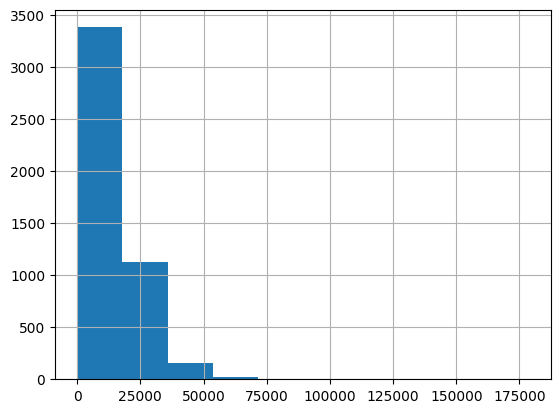

In [ ]:
bmw['precio'].hist()

In [ ]:
bmw['precio'].describe()

count      4685.000000
mean      15954.834578
std        9047.550435
min         100.000000
25%       10900.000000
50%       14300.000000
75%       18700.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: xlabel='precio'>

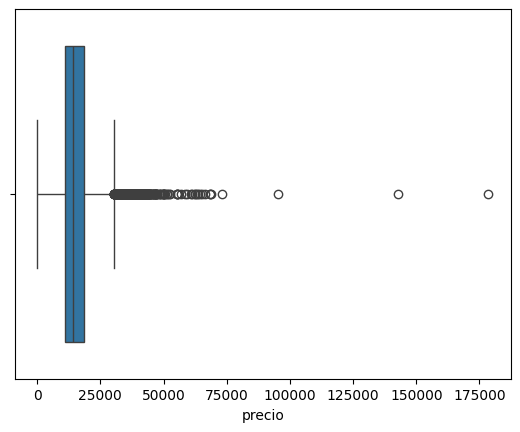

In [ ]:
sns.boxplot(bmw, x='precio')

In [ ]:
pd.set_option('display.max_rows',20)

In [ ]:
bmw['precio'].value_counts(normalize=False).reset_index().sort_values('precio')

,precio,count
186,100.0,6
385,400.0,1
334,500.0,1
380,600.0,1
393,700.0,1
...,...,...
383,68700.0,1
357,73100.0,1
337,95200.0,1
360,142800.0,1


Hacemos una tranformación logaritmica para normalizar la distribución

In [ ]:
bmw['log_precio']=np.log10(bmw['precio'])

<Axes: >

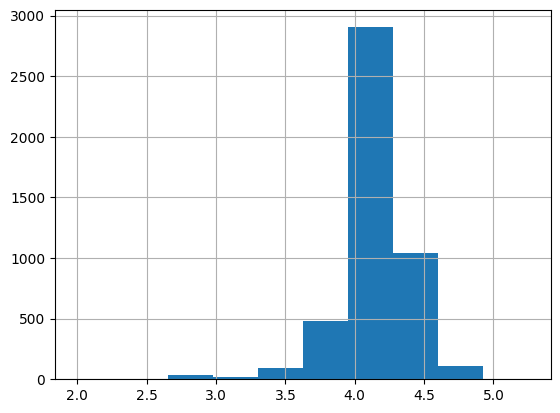

In [ ]:
bmw['log_precio'].hist()

<Axes: xlabel='log_precio'>

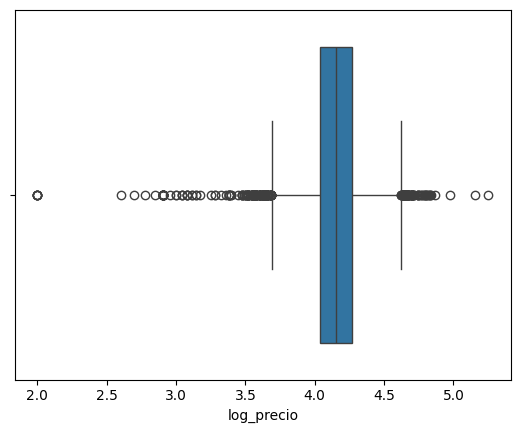

In [ ]:
sns.boxplot(bmw,x='log_precio')

Hay valores muy raros de precio.
Analizo mejor los outliers

#### **Outliers inferiores**

In [ ]:
q1_log_precio = bmw['log_precio'].quantile(0.25)
q3_log_precio = bmw['log_precio'].quantile(0.75)
iqr_log_precio = q3_log_precio - q1_log_precio
lim_inf_log_precio = q1_log_precio - 1.5 * iqr_log_precio
lim_sup_log_precio = q3_log_precio + 1.5 * iqr_log_precio

In [ ]:
10**lim_inf_log_precio

4850.693513964535

In [ ]:
outliers_inf = bmw[bmw['log_precio']<lim_inf_log_precio]

In [ ]:
outliers_inf

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio
20,320,329173.0,110.0,estate,1,0,0,0,0,1,2300.0,11-15,0,3.361728
22,316,265751.0,85.0,coupe,0,0,0,0,1,0,1000.0,4-6,0,3.000000
56,320,187967.0,120.0,coupe,1,0,0,0,1,0,3100.0,7-10,1,3.491362
119,320,209208.0,135.0,estate,0,1,0,0,0,1,800.0,4-6,1,2.903090
124,320,146639.0,135.0,estate,0,1,0,0,0,1,800.0,4-6,0,2.903090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,X5,217045.0,160.0,suv,0,1,0,1,0,1,4600.0,11-15,0,3.662758
4588,X5,220242.0,135.0,suv,0,0,0,0,0,0,3600.0,11-15,1,3.556303
4597,X1,165882.0,105.0,suv,0,0,0,0,0,0,3600.0,4-6,0,3.556303
4677,X3,194966.0,110.0,suv,0,1,1,1,0,0,4800.0,11-15,1,3.681241


In [ ]:
len(bmw[bmw['log_precio']<lim_inf_log_precio])

182

In [ ]:
outliers_inf['edad_coche'].value_counts(normalize=True)

edad_coche
4-6      0.472527
11-15    0.428571
7-10     0.071429
1-3      0.027473
Name: proportion, dtype: float64

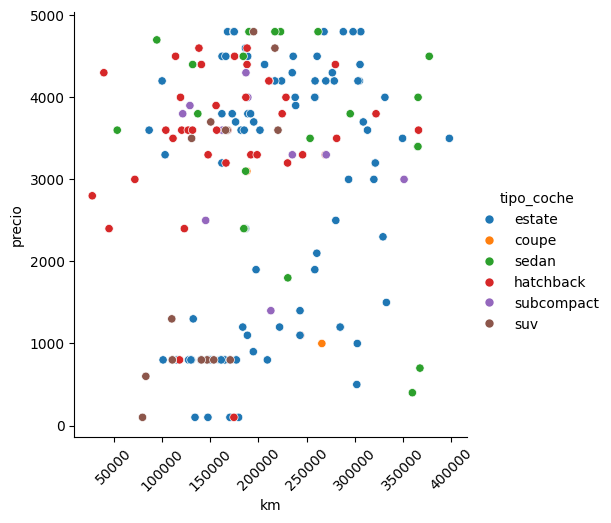

In [ ]:
sns.relplot(outliers_inf,y='precio',x='km',hue='tipo_coche')
plt.xticks(rotation=45)
plt.show()

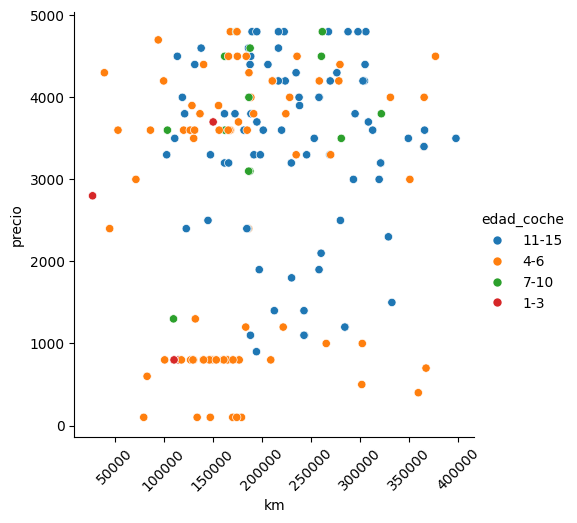

In [ ]:
sns.relplot(outliers_inf,y='precio',x='km',hue='edad_coche')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='precio', ylabel='Density'>

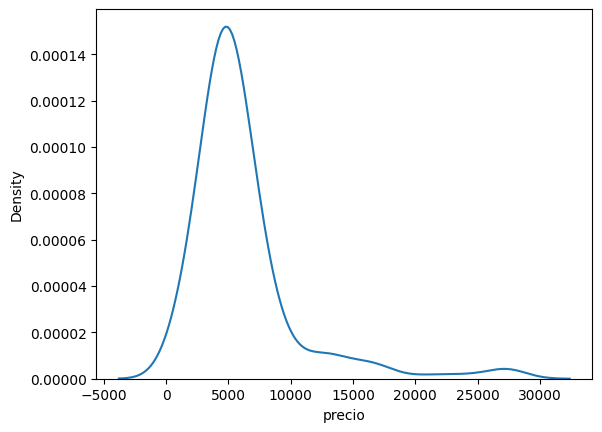

In [ ]:
sns.kdeplot(bmw[bmw['edad_coche']=='11-15'],x='precio')

<Axes: xlabel='precio', ylabel='Density'>

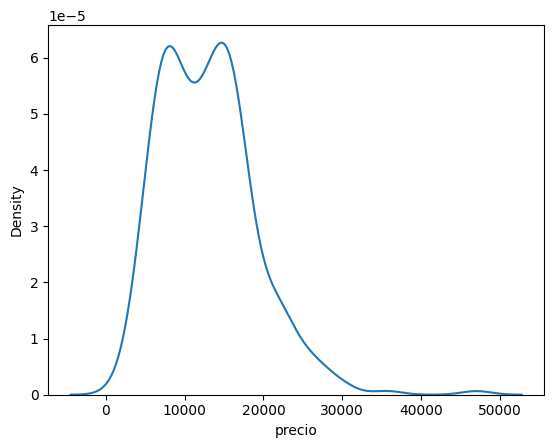

In [ ]:
sns.kdeplot(bmw[bmw['edad_coche']=='7-10'],x='precio')

<Axes: xlabel='precio', ylabel='Density'>

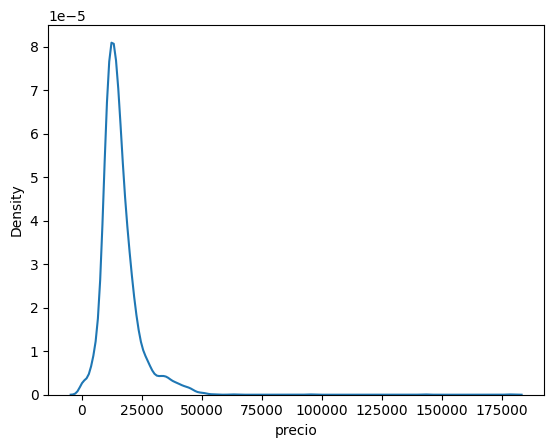

In [ ]:
sns.kdeplot(bmw[bmw['edad_coche']=='4-6'],x='precio')

<Axes: xlabel='km', ylabel='Density'>

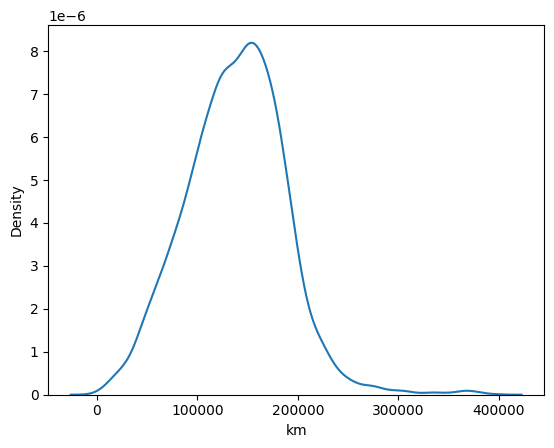

In [ ]:
sns.kdeplot(bmw[bmw['edad_coche']=='4-6'],x='km')

In [ ]:
q3_km_edad_4_6 = bmw[bmw['edad_coche']=='4-6']['km'].quantile(0.75)

Decidemos eliminar los outliers que no pueden ser justificados basandonos en las informaciones que tenemos, ya que pueden derivar de errores o de otras situaciones especiales, como por ejemplo un cohe en muy malas condiciones.
- eliminemos todos los coches con precio < 1000
- precio entre 1000 y 2000, eliminados cualquier coche más joven de 11-15 años
- precio > 2000, eliminados todos los coches de edad 1-3 años y los de 4-6 años con menos kilometros del tercer quartil para su categoría de edad, osea aproximadamente 170mil kilometros.

In [ ]:
lista_eliminar_outliers_inf = []
lista_eliminar_outliers_inf.extend(list(outliers_inf.loc[outliers_inf['precio']<1000].index))
lista_eliminar_outliers_inf.extend(list(outliers_inf.loc[(outliers_inf['precio'].isin(range(1000,2000))) & (outliers_inf['edad_coche']!='11-15')].index))
lista_eliminar_outliers_inf.extend(list(outliers_inf.loc[(outliers_inf['precio']>2000) & ((outliers_inf['edad_coche']=='1-3')|((outliers_inf['edad_coche']=='4-6')&\
(outliers_inf['km']<q3_km_edad_4_6)))].index))

In [ ]:
len(lista_eliminar_outliers_inf)

68

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4685 non-null   object 
 1   km                    4685 non-null   float64
 2   potencia              4685 non-null   float64
 3   tipo_coche            4685 non-null   object 
 4   volante_regulable     4685 non-null   int64  
 5   aire_acondicionado    4685 non-null   int64  
 6   camara_trasera        4685 non-null   int64  
 7   elevalunas_electrico  4685 non-null   int64  
 8   bluetooth             4685 non-null   int64  
 9   alerta_lim_velocidad  4685 non-null   int64  
 10  precio                4685 non-null   float64
 11  edad_coche            4685 non-null   object 
 12  color_estandar        4685 non-null   int64  
 13  log_precio            4685 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 512.5+ KB


In [ ]:
bmw.drop(lista_eliminar_outliers_inf,inplace=True)
bmw.reset_index(drop=True,inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4617 non-null   object 
 1   km                    4617 non-null   float64
 2   potencia              4617 non-null   float64
 3   tipo_coche            4617 non-null   object 
 4   volante_regulable     4617 non-null   int64  
 5   aire_acondicionado    4617 non-null   int64  
 6   camara_trasera        4617 non-null   int64  
 7   elevalunas_electrico  4617 non-null   int64  
 8   bluetooth             4617 non-null   int64  
 9   alerta_lim_velocidad  4617 non-null   int64  
 10  precio                4617 non-null   float64
 11  edad_coche            4617 non-null   object 
 12  color_estandar        4617 non-null   int64  
 13  log_precio            4617 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 505.1+ KB


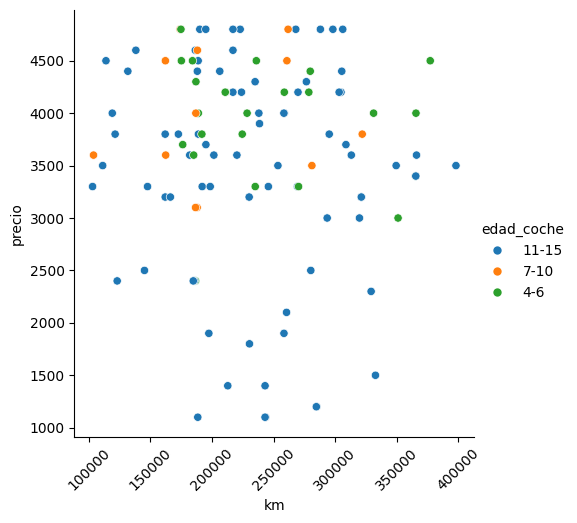

In [ ]:
sns.relplot(bmw[bmw['log_precio']<lim_inf_log_precio],y='precio',x='km',hue='edad_coche')
plt.xticks(rotation=45)
plt.show()

#### **Outliers superiores**



In [ ]:
10**lim_sup_log_precio

42020.79546217448

In [ ]:
outliers_sup = bmw[bmw['log_precio']>lim_sup_log_precio]

In [ ]:
outliers_sup

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio
28,OTROS MODELOS,29925.0,309.0,coupe,1,1,0,1,1,1,47000.0,7-10,0,4.672098
29,OTROS MODELOS,67403.0,230.0,coupe,1,1,1,1,1,1,55200.0,4-6,1,4.741939
48,OTROS MODELOS,12402.0,170.0,coupe,1,1,0,0,0,1,95200.0,4-6,1,4.978637
72,OTROS MODELOS,63421.0,230.0,coupe,1,1,1,1,1,1,45800.0,4-6,1,4.660865
2541,530,5578.0,195.0,sedan,1,1,1,0,1,1,62500.0,1-3,1,4.795880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,X5,72357.0,230.0,suv,1,1,1,1,1,1,42100.0,4-6,0,4.624282
4598,X5,124645.0,230.0,suv,1,1,1,0,0,1,45100.0,4-6,0,4.654177
4602,X5,122588.0,190.0,suv,1,1,0,1,1,1,42800.0,4-6,1,4.631444
4609,OTROS MODELOS,125197.0,230.0,suv,1,1,1,1,1,1,42700.0,1-3,1,4.630428


In [ ]:
len(outliers_sup)/len(bmw)*100

1.8626813948451375

In [ ]:
outliers_sup['tipo_coche'].value_counts(normalize=True)

tipo_coche
suv      0.802326
sedan    0.151163
coupe    0.046512
Name: proportion, dtype: float64

In [ ]:
outliers_sup['edad_coche'].value_counts(normalize=True)

edad_coche
4-6     0.534884
1-3     0.453488
7-10    0.011628
Name: proportion, dtype: float64

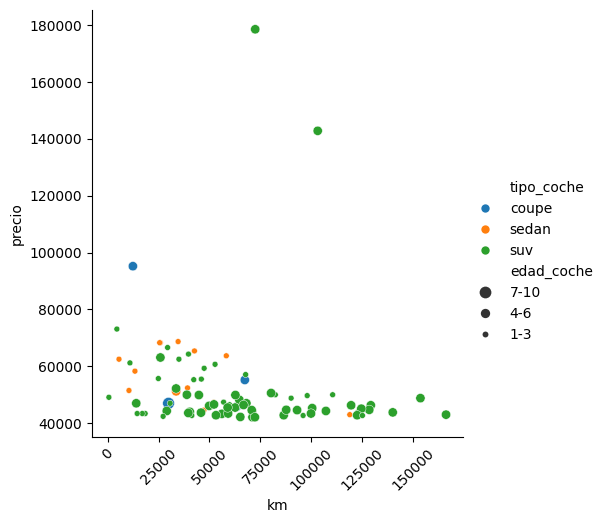

In [ ]:
sns.relplot(outliers_sup,x='km',y='precio',hue='tipo_coche',size='edad_coche')
plt.xticks(rotation=45)
plt.show()

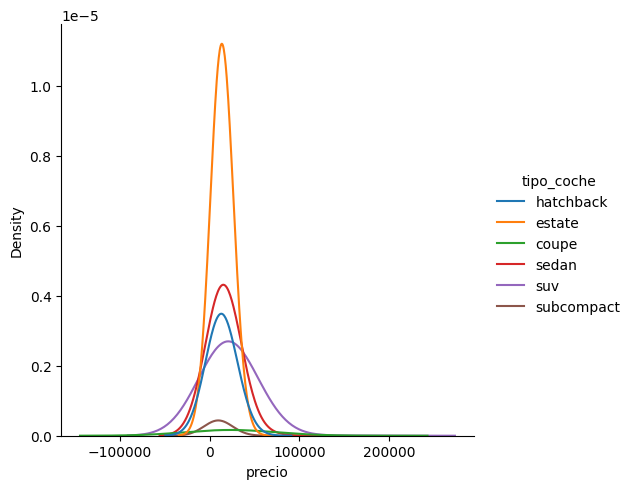

In [ ]:
sns.displot(data=bmw, x='precio',kind='kde',hue='tipo_coche',bw_adjust=10);

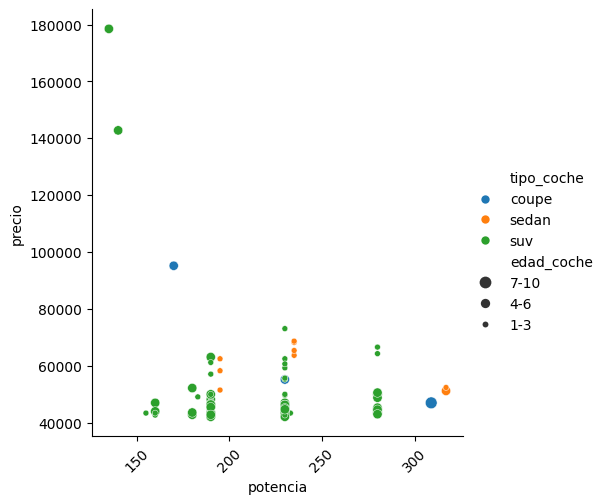

In [ ]:
sns.relplot(outliers_sup,x='potencia',y='precio',hue='tipo_coche',size='edad_coche')
plt.xticks(rotation=45)
plt.show()

Notamos que la mayoría de los outliers superiores tiene sentido porqué son coches más recientes y/o de tipo más caro, como coupe, suv o sedan.
Pero se notan también tres registros que tienen un precio muy elevado que no es posible justificar con las informaciones que tenemos y que se aleja mucho de los demás. Por eso decidemos borrarlos.

In [ ]:
bmw[bmw['precio']>80000]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio
48,OTROS MODELOS,12402.0,170.0,coupe,1,1,0,0,0,1,95200.0,4-6,1,4.978637
4502,OTROS MODELOS,103222.0,140.0,suv,1,1,0,1,0,1,142800.0,4-6,1,5.154728
4570,X3,72515.0,135.0,suv,0,0,1,0,0,1,178500.0,4-6,1,5.251638


In [ ]:
bmw[bmw['precio']>80000]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio
48,OTROS MODELOS,12402.0,170.0,coupe,1,1,0,0,0,1,95200.0,4-6,1,4.978637
4502,OTROS MODELOS,103222.0,140.0,suv,1,1,0,1,0,1,142800.0,4-6,1,5.154728
4570,X3,72515.0,135.0,suv,0,0,1,0,0,1,178500.0,4-6,1,5.251638


In [ ]:
bmw.drop(bmw[bmw['precio']>80000].index,inplace=True)
bmw.reset_index(drop=True,inplace=True)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4614 non-null   object 
 1   km                    4614 non-null   float64
 2   potencia              4614 non-null   float64
 3   tipo_coche            4614 non-null   object 
 4   volante_regulable     4614 non-null   int64  
 5   aire_acondicionado    4614 non-null   int64  
 6   camara_trasera        4614 non-null   int64  
 7   elevalunas_electrico  4614 non-null   int64  
 8   bluetooth             4614 non-null   int64  
 9   alerta_lim_velocidad  4614 non-null   int64  
 10  precio                4614 non-null   float64
 11  edad_coche            4614 non-null   object 
 12  color_estandar        4614 non-null   int64  
 13  log_precio            4614 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 504.8+ KB


array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

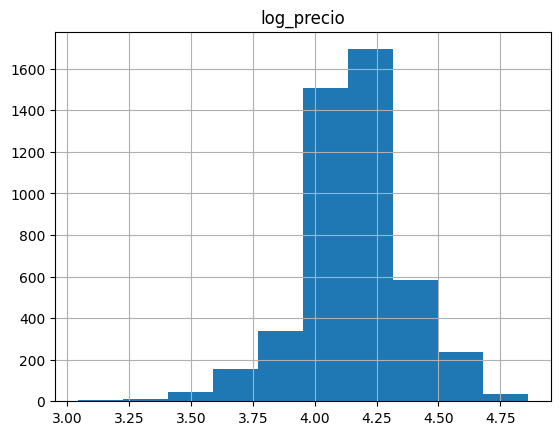

In [ ]:
bmw.hist('log_precio')

<Axes: >

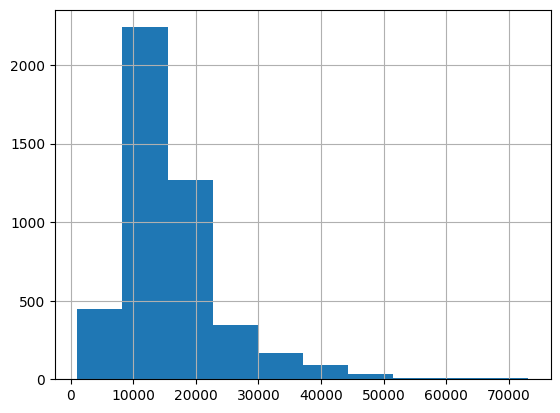

In [ ]:
bmw['precio'].hist()

In [ ]:
bmw['precio'].describe()

count     4614.00000
mean     16084.20026
std       8337.88101
min       1100.00000
25%      11100.00000
50%      14300.00000
75%      18800.00000
max      73100.00000
Name: precio, dtype: float64

Ahora la distribucion de precios tiene mucho mas sentido. Y a parte la distribucion de las otras variables principales ha quedado invariada, como muestro a continuacion. Buena signal.

In [ ]:
bmw['edad_coche'].value_counts(normalize=True)

edad_coche
4-6      0.828782
7-10     0.069788
1-3      0.061552
11-15    0.039879
Name: proportion, dtype: float64

In [ ]:
bmw['tipo_coche'].value_counts(normalize=True)

tipo_coche
estate        0.361075
suv           0.225401
sedan         0.219332
hatchback     0.156047
coupe         0.020590
subcompact    0.017555
Name: proportion, dtype: float64

In [ ]:
bmw['modelo'].value_counts(normalize=True)

modelo
320                 0.154963
520                 0.134374
OTROS MODELOS       0.118336
318                 0.117902
X3                  0.093628
116                 0.074989
X1                  0.057000
X5                  0.049632
316                 0.047681
525                 0.037278
530                 0.033377
118                 0.029909
318 Gran Turismo    0.021023
320 Gran Turismo    0.015605
518                 0.014304
Name: proportion, dtype: float64

### **06 - Target VS otras variables**

In [ ]:
# PRECIO VS MODELO

<ipython-input-348-7c9418b09c29>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(bmw,x='modelo',y='precio',palette='coolwarm' )


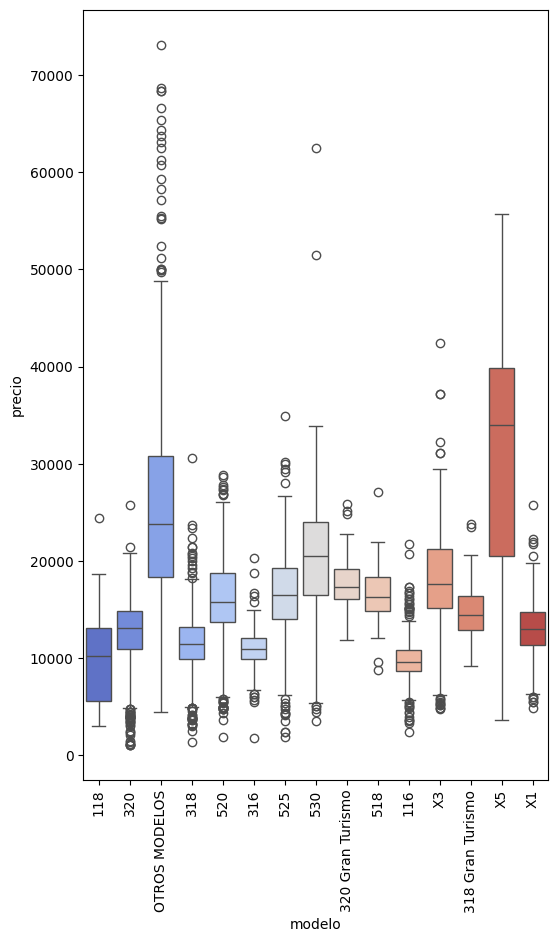

In [ ]:
plt.figure(figsize=(6,10))
sns.boxplot(bmw,x='modelo',y='precio',palette='coolwarm' )
plt.xticks(rotation=90)
plt.show()

In [ ]:
# PRECIO VS TIPO_COCHE

<ipython-input-350-399a0d182b29>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(bmw,x='tipo_coche',y='precio',palette='deep');


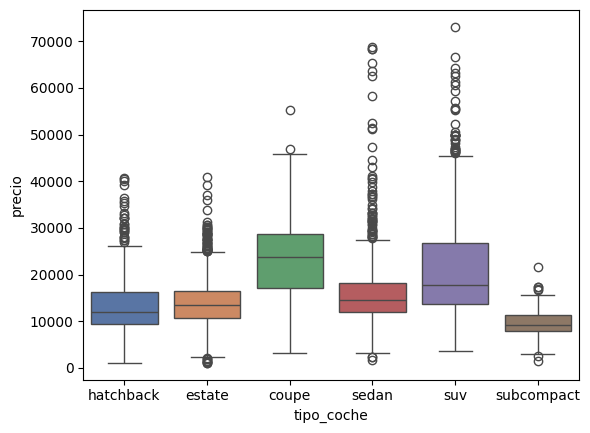

In [ ]:
sns.boxplot(bmw,x='tipo_coche',y='precio',palette='deep');

<ipython-input-351-1891163c602c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(bmw,x='edad_coche',y='precio',palette='dark');


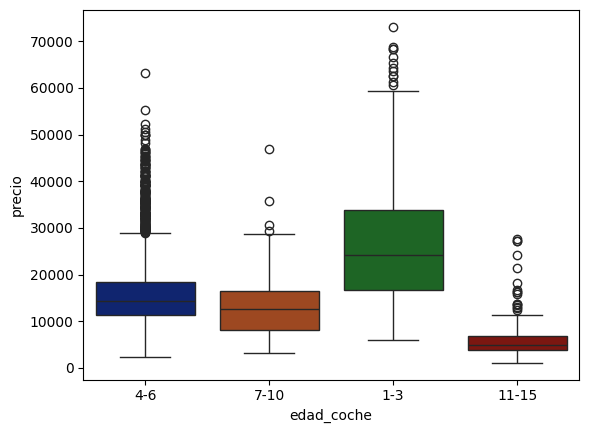

In [ ]:
# PRECIO VS EDAD_COCHE
sns.boxplot(bmw,x='edad_coche',y='precio',palette='dark');

<Figure size 1000x600 with 0 Axes>

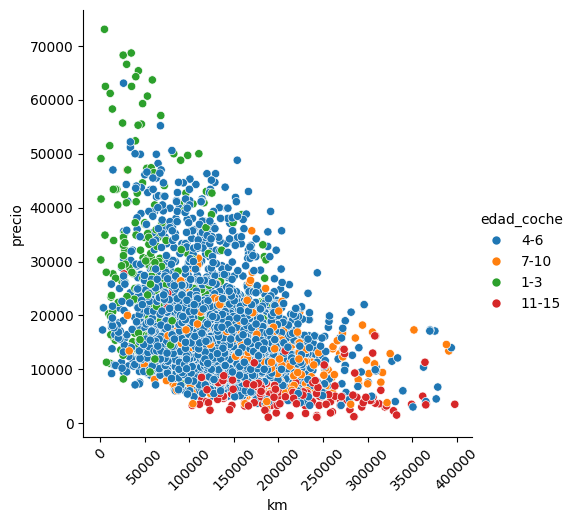

In [ ]:
# PRECIO VS KM
plt.figure(figsize=(10, 6))
sns.relplot(bmw,x='km',y='precio', hue='edad_coche');
plt.xticks(rotation=45)
plt.show()

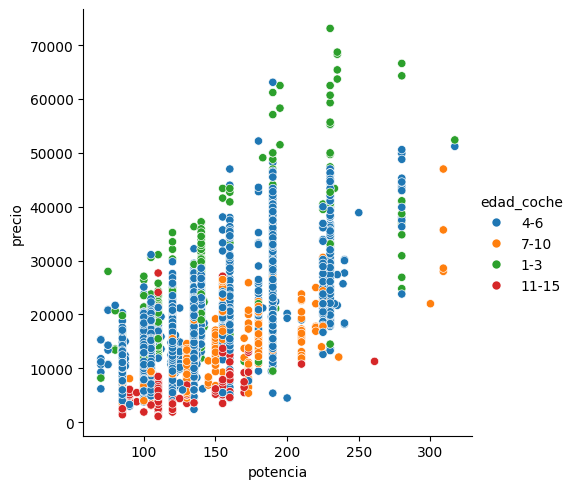

In [ ]:
# PRECIO VS POTENCIA Y EDAD_COCHE
sns.relplot(bmw,x='potencia',y='precio',hue='edad_coche');

<ipython-input-354-d7933a706473>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=i,y="precio",  data=bmw, palette="deep")
<ipython-input-354-d7933a706473>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=i,y="precio",  data=bmw, palette="deep")
<ipython-input-354-d7933a706473>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=i,y="precio",  data=bmw, palette="deep")
<ipython-input-354-d7933a706473>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

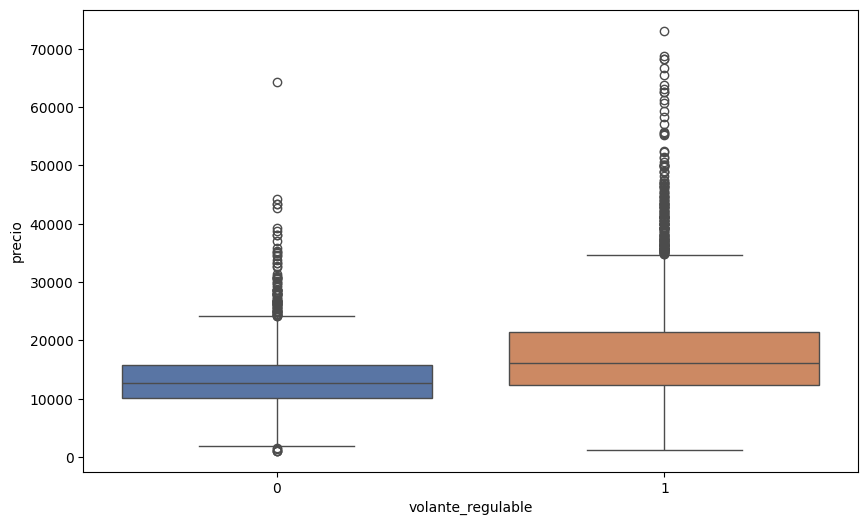

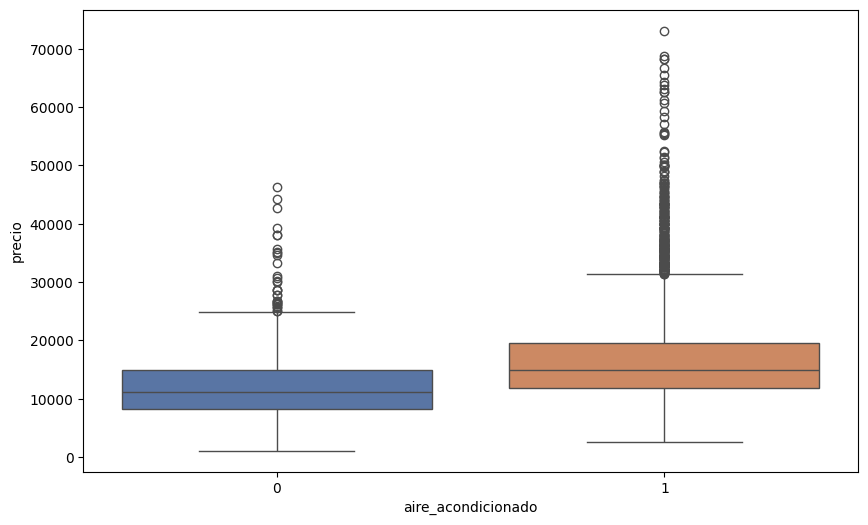

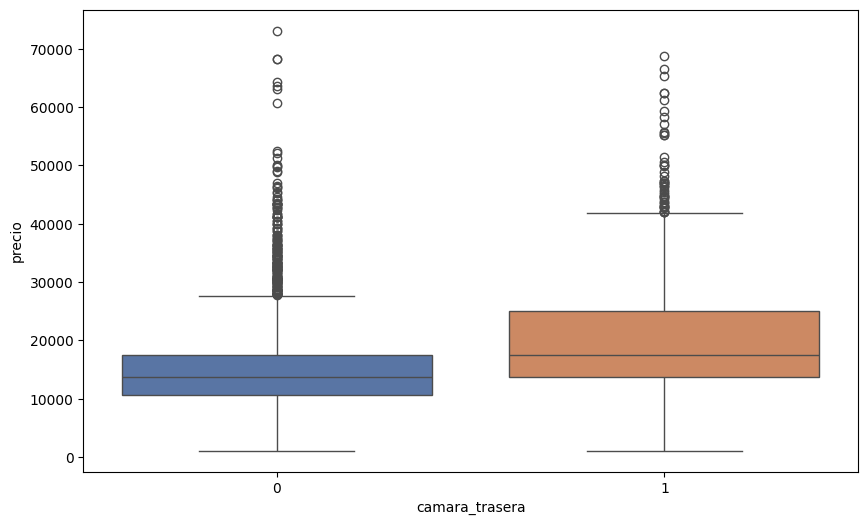

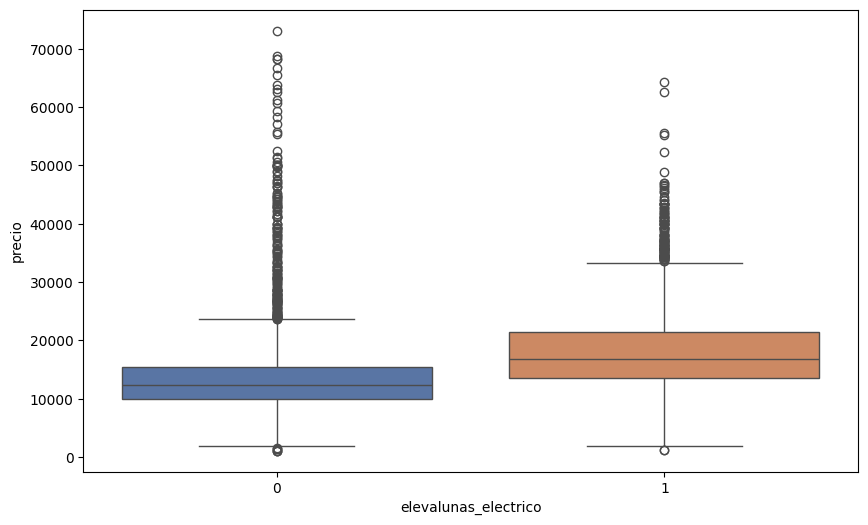

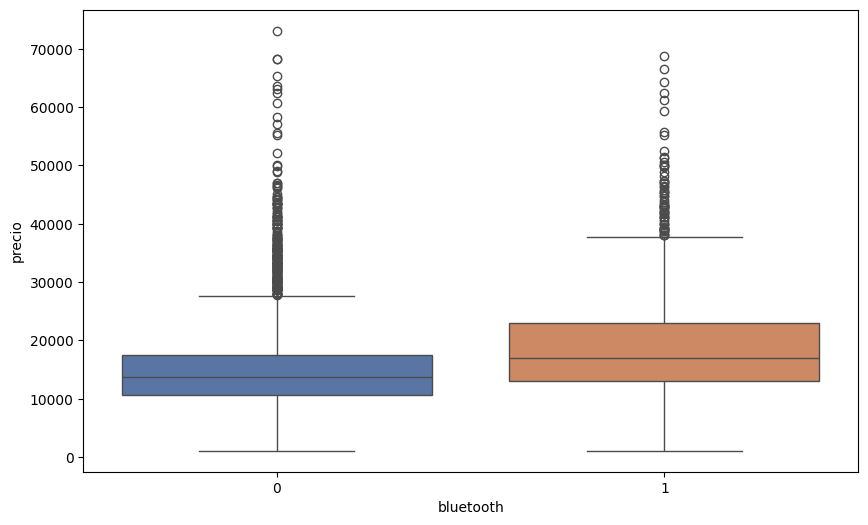

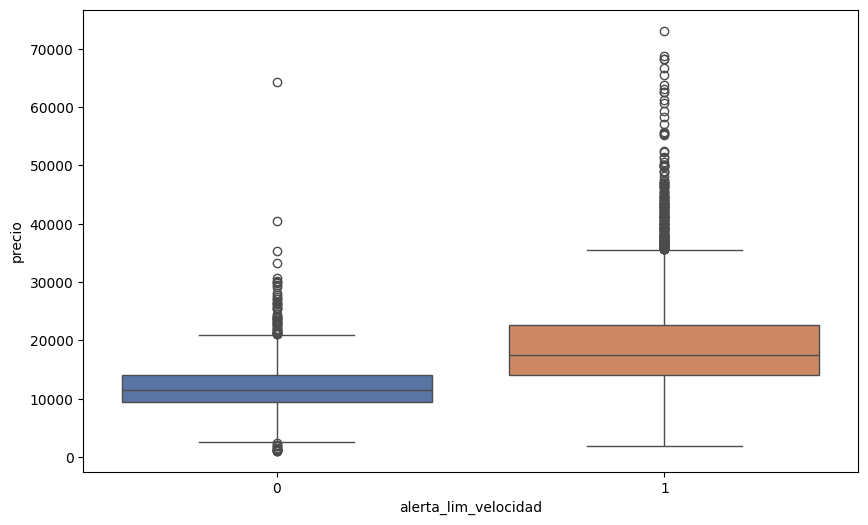

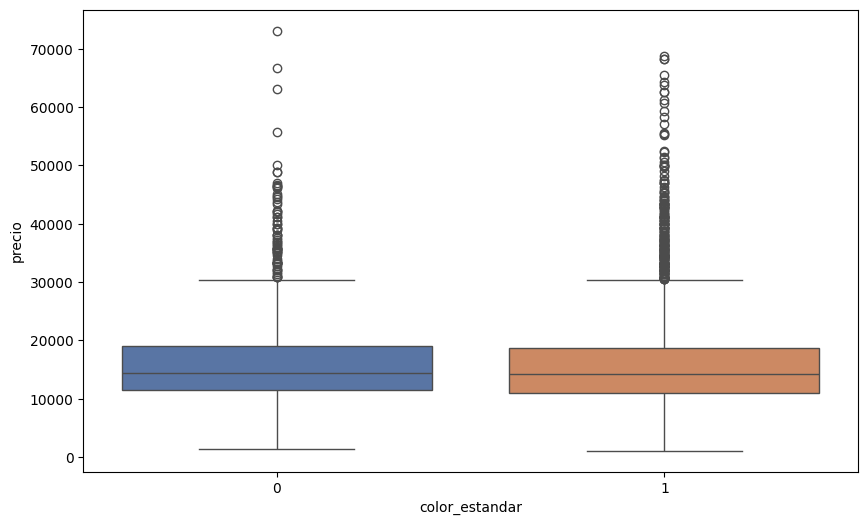

In [ ]:
# PRECIO VS OPTIONALS EXTRAS & PRECIO VS COLOR_ESTANDAR
for i in bmw:
  if len(bmw[i].unique())==2:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,y="precio",  data=bmw, palette="deep")

In [ ]:
pd.to_pickle(bmw,'/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_riprendi_da_qui_4')

In [ ]:
bmw = pd.read_pickle('/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_riprendi_da_qui_4')

## **07 - Trasformación de variables categoricas**

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4614 non-null   object 
 1   km                    4614 non-null   float64
 2   potencia              4614 non-null   float64
 3   tipo_coche            4614 non-null   object 
 4   volante_regulable     4614 non-null   int64  
 5   aire_acondicionado    4614 non-null   int64  
 6   camara_trasera        4614 non-null   int64  
 7   elevalunas_electrico  4614 non-null   int64  
 8   bluetooth             4614 non-null   int64  
 9   alerta_lim_velocidad  4614 non-null   int64  
 10  precio                4614 non-null   float64
 11  edad_coche            4614 non-null   object 
 12  color_estandar        4614 non-null   int64  
 13  log_precio            4614 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 504.8+ KB


Usarémos las siguientes tecnicas:
- modelo ---> One Hot Encoding
- tipo_coche ---> One Hot Encoding
- edad_coche ---> Ordinal Encoder

In [ ]:
bmw.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio
0,118,140411.0,100.0,hatchback,1,1,0,1,1,0,11300.0,4-6,1,4.053078
1,320,183297.0,120.0,estate,0,0,0,1,0,0,10200.0,4-6,0,4.008600
2,OTROS MODELOS,97097.0,160.0,coupe,1,1,0,0,1,1,33400.0,4-6,0,4.523746
3,OTROS MODELOS,152352.0,225.0,coupe,1,1,0,1,1,1,17100.0,7-10,1,4.232996
4,OTROS MODELOS,132025.0,135.0,coupe,1,1,0,1,1,1,21700.0,4-6,1,4.336460


In [ ]:
bmw['edad_coche'].unique()

array(['4-6', '7-10', '1-3', '11-15'], dtype=object)

In [ ]:
oe = OrdinalEncoder(categories=[['1-3','4-6','7-10','11-15']])

In [ ]:
oe

OrdinalEncoder(categories=[['1-3', '4-6', '7-10', '11-15']])

In [ ]:
bmw['edad_coche'] = oe.fit_transform(bmw[['edad_coche']])

In [ ]:
bmw.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio
0,118,140411.0,100.0,hatchback,1,1,0,1,1,0,11300.0,1.0,1,4.053078
1,320,183297.0,120.0,estate,0,0,0,1,0,0,10200.0,1.0,0,4.008600
2,OTROS MODELOS,97097.0,160.0,coupe,1,1,0,0,1,1,33400.0,1.0,0,4.523746
3,OTROS MODELOS,152352.0,225.0,coupe,1,1,0,1,1,1,17100.0,2.0,1,4.232996
4,OTROS MODELOS,132025.0,135.0,coupe,1,1,0,1,1,1,21700.0,1.0,1,4.336460


Ahora transformemos modelo y tipo_coche

In [ ]:
l_cat=[]
for i in bmw:
  if bmw[i].dtype.kind=='O':
    l_cat.append(i)

In [ ]:
l_cat

['modelo', 'tipo_coche']

In [ ]:
bmw = pd.get_dummies(bmw,columns=l_cat,dtype=int)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4614 non-null   float64
 1   potencia                 4614 non-null   float64
 2   volante_regulable        4614 non-null   int64  
 3   aire_acondicionado       4614 non-null   int64  
 4   camara_trasera           4614 non-null   int64  
 5   elevalunas_electrico     4614 non-null   int64  
 6   bluetooth                4614 non-null   int64  
 7   alerta_lim_velocidad     4614 non-null   int64  
 8   precio                   4614 non-null   float64
 9   edad_coche               4614 non-null   float64
 10  color_estandar           4614 non-null   int64  
 11  log_precio               4614 non-null   float64
 12  modelo_116               4614 non-null   int64  
 13  modelo_118               4614 non-null   int64  
 14  modelo_316              

## **08 - Escalar variables numericas**

In [ ]:
def get_lista_num(dataset):
  l_num = []
  for i in dataset:
    if i in ['precio','log_precio']:
      continue
    elif (dataset[i].dtype.kind in ['i','f']) and (len(dataset[i].unique())!=2):
      l_num.append(i)
  return l_num

In [ ]:
l_num = get_lista_num(bmw)

In [ ]:
l_num

['km', 'potencia', 'edad_coche']

In [ ]:
MinMaxRes=MinMaxScaler()

In [ ]:
bmw[l_num] = MinMaxRes.fit_transform(bmw[l_num])

In [ ]:
bmw

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,...,modelo_OTROS MODELOS,modelo_X1,modelo_X3,modelo_X5,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv
0,0.351978,0.121457,1,1,0,1,1,0,11300.0,0.333333,...,0,0,0,0,0,0,1,0,0,0
1,0.459850,0.202429,0,0,0,1,0,0,10200.0,0.333333,...,0,0,0,0,0,1,0,0,0,0
2,0.243031,0.364372,1,1,0,0,1,1,33400.0,0.333333,...,1,0,0,0,1,0,0,0,0,0
3,0.382014,0.627530,1,1,0,1,1,1,17100.0,0.666667,...,1,0,0,0,1,0,0,0,0,0
4,0.330885,0.263158,1,1,0,1,1,1,21700.0,0.333333,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,0.280421,0.485830,1,1,0,1,0,1,26500.0,0.333333,...,0,0,0,1,0,0,0,0,0,1
4610,0.308056,0.485830,1,1,1,0,1,1,37500.0,0.333333,...,0,0,0,1,0,0,0,0,0,1
4611,0.110701,0.161943,1,0,1,0,0,1,15500.0,0.000000,...,0,0,1,0,0,0,0,0,0,1
4612,0.243174,0.263158,0,1,0,1,1,1,22800.0,0.333333,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.to_pickle(bmw,'/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_prep')

In [ ]:
bmw_prep = pd.read_pickle('/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/dataset/bmw_prep')

In [ ]:
bmw_prep[bmw_prep['edad_coche']==1]

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,...,modelo_OTROS MODELOS,modelo_X1,modelo_X3,modelo_X5,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv
20,0.826771,0.161943,1,0,0,0,0,1,2300.0,1.0,...,0,0,0,0,0,1,0,0,0,0
52,0.428572,0.404858,1,0,0,1,1,1,9200.0,1.0,...,1,0,0,0,1,0,0,0,0,0
96,0.508933,0.202429,1,0,0,1,0,0,7700.0,1.0,...,0,0,0,0,0,1,0,0,0,0
177,0.538815,0.202429,1,1,0,1,0,1,5100.0,1.0,...,0,0,0,0,0,1,0,0,0,0
191,0.598933,0.080972,0,1,0,0,0,0,3900.0,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,0.433391,0.364372,1,1,0,1,1,1,11200.0,1.0,...,0,0,1,0,0,0,0,0,0,1
4578,0.452774,0.161943,1,1,0,0,0,0,5900.0,1.0,...,0,0,1,0,0,0,0,0,0,1
4584,0.605583,0.344130,1,0,1,0,0,1,7900.0,1.0,...,0,0,0,1,0,0,0,0,0,1
4590,0.717346,0.417004,1,1,0,1,0,1,9300.0,1.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
bmw_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4614 non-null   float64
 1   potencia                 4614 non-null   float64
 2   volante_regulable        4614 non-null   int64  
 3   aire_acondicionado       4614 non-null   int64  
 4   camara_trasera           4614 non-null   int64  
 5   elevalunas_electrico     4614 non-null   int64  
 6   bluetooth                4614 non-null   int64  
 7   alerta_lim_velocidad     4614 non-null   int64  
 8   precio                   4614 non-null   float64
 9   edad_coche               4614 non-null   float64
 10  color_estandar           4614 non-null   int64  
 11  log_precio               4614 non-null   float64
 12  modelo_116               4614 non-null   int64  
 13  modelo_118               4614 non-null   int64  
 14  modelo_316              

In [ ]:
# verifiquemos si hay variables correlacionadas en el dataset final

In [ ]:
bmw_prep.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,edad_coche,color_estandar,log_precio,modelo_116,modelo_118,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_518,modelo_520,modelo_525,modelo_530,modelo_OTROS MODELOS,modelo_X1,modelo_X3,modelo_X5,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv
km,1.000000,-0.032301,0.074755,0.050514,0.005987,0.062376,-0.033753,-0.025104,-0.421680,0.416968,0.052546,-0.456640,-0.111929,-0.026794,-0.000917,0.056430,0.010044,0.092011,-0.018062,0.033925,0.090779,0.094911,0.072339,-0.154799,-0.060217,-0.030295,-0.044356,-0.081602,0.161165,-0.120711,0.076293,-0.036658,-0.116720
potencia,-0.032301,1.000000,0.326963,0.183243,0.317621,0.346388,0.230230,0.505351,0.687112,-0.049077,0.031083,0.613540,-0.328241,-0.119368,-0.258578,-0.266695,-0.104862,-0.034533,0.012645,-0.083241,-0.016300,0.120946,0.277340,0.482841,-0.122076,0.040278,0.355406,0.141671,-0.035974,-0.241359,0.008501,-0.144745,0.239900
volante_regulable,0.074755,0.326963,1.000000,0.294011,0.259431,0.274783,0.126474,0.238651,0.282240,0.055852,0.067169,0.262686,-0.199587,-0.124920,-0.129788,-0.102340,-0.048550,-0.094984,-0.014281,0.063488,0.174039,0.099728,0.100360,0.151579,-0.098447,0.056392,0.143811,0.034243,-0.014423,-0.172588,0.082204,-0.099867,0.104816
aire_acondicionado,0.050514,0.183243,0.294011,1.000000,0.143003,0.253599,0.100732,0.201415,0.222657,-0.142455,0.033927,0.288893,-0.166608,-0.117918,-0.023546,0.017216,0.028677,-0.049759,-0.000862,0.041729,0.141765,0.055654,0.070677,0.049392,-0.122707,-0.011927,0.077618,-0.044279,0.086649,-0.129428,0.080897,-0.119038,-0.014845
camara_trasera,0.005987,0.317621,0.259431,0.143003,1.000000,0.198102,0.133497,0.210527,0.266829,0.044733,0.019771,0.230773,-0.108349,-0.035915,-0.083753,-0.101396,-0.026048,-0.069934,0.009408,0.001855,0.000542,0.055415,0.072490,0.181839,-0.025778,0.016658,0.145239,0.020533,-0.032386,-0.056486,-0.016018,-0.047660,0.110149
elevalunas_electrico,0.062376,0.346388,0.274783,0.253599,0.198102,1.000000,0.235754,0.366511,0.271327,-0.012310,0.031389,0.332516,-0.177513,-0.097583,-0.152962,-0.155308,-0.042039,-0.007539,0.031294,0.097878,0.117940,0.099957,0.128423,0.171582,-0.101915,0.012830,0.099246,0.097982,0.054925,-0.103649,-0.001891,-0.103535,0.027997
bluetooth,-0.033753,0.230230,0.126474,0.100732,0.133497,0.235754,1.000000,0.105690,0.216881,-0.065369,-0.009026,0.216479,-0.058156,0.018612,-0.075918,-0.050753,0.021746,-0.003302,0.048196,-0.041315,-0.054933,0.015670,0.039673,0.176451,-0.079613,0.027399,0.017594,0.145729,-0.016194,0.019759,-0.032737,-0.050393,0.000186
alerta_lim_velocidad,-0.025104,0.505351,0.238651,0.201415,0.210527,0.366511,0.105690,1.000000,0.471121,-0.090831,0.004501,0.499987,-0.289614,-0.123864,-0.168150,-0.193685,-0.051716,-0.016810,0.054903,0.047336,0.102093,0.140071,0.140079,0.194689,-0.069129,0.077382,0.187996,0.036952,0.026294,-0.200000,0.014335,-0.136890,0.159745
precio,-0.421680,0.687112,0.282240,0.222657,0.266829,0.271327,0.216881,0.471121,1.000000,-0.383202,-0.018020,0.917019,-0.212121,-0.130476,-0.139763,-0.207179,-0.021612,-0.179670,0.024905,0.005855,-0.007188,0.004133,0.090636,0.422289,-0.089484,0.072429,0.403614,0.120293,-0.203321,-0.134633,-0.005014,-0.102720,0.347014
edad_coche,0.416968,-0.049077,0.055852,-0.142455,0.044733,-0.012310,-0.065369,-0.090831,-0.383202,1.000000,0.035529,-0.491629,-0.036260,0.009223,-0.033181,0.025428,-0.032752,0.039492,-0.033967,-0.047365,-0.012607,0.115818,0.019160,-0.119856,-0.012548,0.064302,0.040979,0.007574,0.036808,-0.074479,0.007827,-0.006598,0.014123


In [ ]:
resultado_df=bmw_prep.corr().unstack().sort_values(ascending = False).to_frame().reset_index()
print(resultado_df[(resultado_df['level_0']!=resultado_df['level_1'])].to_string())

                      level_0                  level_1         0
33                 log_precio                   precio  0.917019
34                     precio               log_precio  0.917019
35                     precio                 potencia  0.687112
36                   potencia                   precio  0.687112
37                   potencia               log_precio  0.613540
38                 log_precio                 potencia  0.613540
39                  modelo_X3           tipo_coche_suv  0.594033
40             tipo_coche_suv                modelo_X3  0.594033
41       tipo_coche_hatchback               modelo_116  0.528364
42                 modelo_116     tipo_coche_hatchback  0.528364
43       alerta_lim_velocidad                 potencia  0.505351
44                   potencia     alerta_lim_velocidad  0.505351
45                 log_precio     alerta_lim_velocidad  0.499987
46       alerta_lim_velocidad               log_precio  0.499987
47       modelo_OTROS MOD

In [ ]:
bmw_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4614 non-null   float64
 1   potencia                 4614 non-null   float64
 2   volante_regulable        4614 non-null   int64  
 3   aire_acondicionado       4614 non-null   int64  
 4   camara_trasera           4614 non-null   int64  
 5   elevalunas_electrico     4614 non-null   int64  
 6   bluetooth                4614 non-null   int64  
 7   alerta_lim_velocidad     4614 non-null   int64  
 8   precio                   4614 non-null   float64
 9   edad_coche               4614 non-null   float64
 10  color_estandar           4614 non-null   int64  
 11  log_precio               4614 non-null   float64
 12  modelo_116               4614 non-null   int64  
 13  modelo_118               4614 non-null   int64  
 14  modelo_316              

In [ ]:
bmw_prep_head_50 = bmw_prep.head(50)

In [ ]:
bmw_prep_head_50.to_excel('/content/drive/MyDrive/Master_Data_Science/Entregables/Entregable_01-Data_Preparetion/bmw_head_50.xlsx')